<a href="https://colab.research.google.com/github/marcellongvb/electricity_fraud/blob/master/Electricity_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electricity Fraud Detection

The purpose of this work is to analyze the probability of risk of fraud given by a model that the client possess, testing if it is good and makes sense, and also to propose alternative models that could achieve better results than it.


Author: Marcello Nery




In [ ]:
# Importing necessary libraries
import pandas as pd                             # Library for working with data
import matplotlib.pyplot as plt                 # Library for data visualization
import seaborn as sns                           # Library for data visualization

In [ ]:
# Importing data
df = pd.read_csv('https://raw.githubusercontent.com/marcellongvb/electricity_fraud/master/electricity%20thief.csv')

## Exploratory data analysis

In [ ]:
df.head()

,Instalation Code,Location,Class,Phase,Fraud Probability Rate,Consumption 12M,Consumption 11M,Consumption 10M,Consumption 9M,Consumption 8M,Consumption 7M,Consumption 6M,Consumption 5M,Consumption 4M,Consumption 3M,Consumption 2M,Consumption 1M,Inspection Results
0,3,Rio de Janeiro,Residential,1 Phase,0.5,491.172,702.916,736.914,813.144,762.324,644.2,558.0,548.092,858.788,337.958,640.952,100.0,Fraud
1,5,Rio de Janeiro,Residential,2 Phase,0.2,592.000,826.000,1081.000,1061.000,1204.000,1111.0,1454.0,1049.000,916.000,1033.000,828.000,813.0,No Fraud
2,6,Rio de Janeiro,Residential,2 Phase,0.6,50.000,50.000,50.000,50.000,50.000,50.0,524.0,166.000,372.000,314.000,455.000,293.0,No Fraud
3,7,Rio de Janeiro,Residential,1 Phase,0.4,30.000,30.000,30.000,30.000,30.000,30.0,721.0,721.000,721.000,450.000,450.000,1262.0,Fraud
4,8,Rio de Janeiro,Residential,1 Phase,0.1,316.000,247.000,196.000,177.000,192.000,166.0,173.0,153.000,245.000,465.000,342.000,355.0,No Fraud


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Instalation Code        91 non-null     int64  
 1   Location                91 non-null     object 
 2   Class                   91 non-null     object 
 3   Phase                   91 non-null     object 
 4   Fraud Probability Rate  91 non-null     float64
 5   Consumption 12M         91 non-null     float64
 6   Consumption 11M         91 non-null     float64
 7   Consumption 10M         91 non-null     float64
 8   Consumption 9M          91 non-null     float64
 9   Consumption 8M          91 non-null     float64
 10  Consumption 7M          91 non-null     float64
 11  Consumption 6M          91 non-null     float64
 12  Consumption 5M          91 non-null     float64
 13  Consumption 4M          91 non-null     float64
 14  Consumption 3M          91 non-null     floa

The data contains only 91 data entries and 18 columns. Let's analyse the values of each column to determine what they mean.

In [ ]:
for column in df.columns:
  print('Variable -', column, ': \n', df[column].value_counts(), '\n')

Variable - Instalation Code : 
 10001    1
27       1
30       1
31       1
32       1
        ..
70       1
71       1
72       1
73       1
3        1
Name: Instalation Code, Length: 91, dtype: int64 

Variable - Location : 
 Rio de Janeiro    48
São Paulo         43
Name: Location, dtype: int64 

Variable - Class : 
 Commercial     48
Residential    43
Name: Class, dtype: int64 

Variable - Phase : 
 1 Phase    54
2 Phase    21
3 Phase    16
Name: Phase, dtype: int64 

Variable - Fraud Probability Rate : 
 0.1    41
0.2    16
0.4     7
0.9     7
0.8     6
0.3     5
0.5     4
0.7     3
0.6     2
Name: Fraud Probability Rate, dtype: int64 

Variable - Consumption 12M : 
 30.000     9
100.000    5
50.000     5
122.000    2
217.991    1
          ..
590.000    1
220.000    1
144.000    1
473.000    1
592.000    1
Name: Consumption 12M, Length: 74, dtype: int64 

Variable - Consumption 11M : 
 30.000      13
50.000       7
100.000      5
240.000      2
36.000       2
            ..
1798.

A place containing an electrical installation is often referred as a *consuming unit*.

A first look at the columns' entries already gives us enough information about what they are. Let's give a description to each one of them:

* ```Instalation Code```: The identifier of each consuming unit (this can be inferred by the fact that there is no more than 1 occurrence of each value of ```Instalation Code```);

* ```Location```: Place of the installation (Rio de Janeiro or São Paulo) ;

* ```Class```: Category of installation type (Residential or Commercial);

* ```Phase```: Type of the electric-power phase. (1 phase, 2 phase, 3 phase). For more details about the phase types, one can access here: [Single-phase electric power](https://en.wikipedia.org/wiki/Single-phase_electric_power), [Two-phase electric power](https://en.wikipedia.org/wiki/Two-phase_electric_power), [Three-phase electric power](https://en.wikipedia.org/wiki/Three-phase_electric_power).

* ```Fraud Probability Rate```: The probability of fraud given by the model that the client possesses. These probabilities must be used for evaluating the model's performance;

* ```Inspection Results```: The actual fraud status provided by technical inspection of the consuming unit (Fraud or No fraud);

* ```Consumption #M```: The total consumption of electricity for the specific month in the period of the last 12 months (1M = last 1 month, 12M = last 12 months);



Next, we will try to analyze the behaviour of the consumption of some properties depending on the phase, class and inspection results. 

In [ ]:
# Defining list with names of consumption columns
consumptions_columns = df.columns[5:17].to_list()
consumptions_columns

['Consumption 12M',
 'Consumption 11M',
 'Consumption 10M',
 'Consumption 9M',
 'Consumption 8M',
 'Consumption 7M',
 'Consumption 6M',
 'Consumption 5M',
 'Consumption 4M',
 'Consumption 3M',
 'Consumption 2M',
 'Consumption 1M']

Let's plot the consumption in ascending order of two fixed consuming units: One with fraud and one with no fraud:

*Remark: The titles and legends in the images will be printed in portuguese, as they will be used in a presentation in portuguese*

In [ ]:
# Taking first occurrences of Fraud and No Fraud in data

fraud_example_index = df[df['Inspection Results'] == 'Fraud'].head(1).index
no_fraud_example_index = df[df['Inspection Results'] == 'No Fraud'].head(1).index

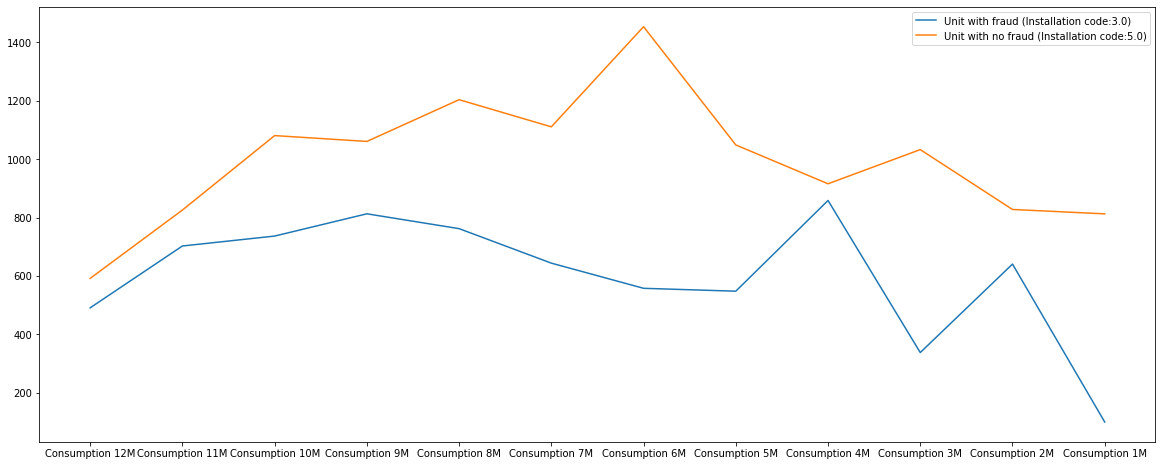

In [ ]:
# Plotting consumptions for each of the above examples

plt.figure(figsize = (20,8))
fraud_consumptions =  df.iloc[fraud_example_index][['Instalation Code'] + consumptions_columns].iloc[0]
no_fraud_consumptions = df.iloc[no_fraud_example_index][['Instalation Code'] + consumptions_columns].iloc[0]
plt.plot(fraud_consumptions[consumptions_columns], label = 'Unit with fraud (Installation code:' + fraud_consumptions['Instalation Code'].astype(str)+ ')')
plt.plot(no_fraud_consumptions[consumptions_columns], label = 'Unit with no fraud (Installation code:' + no_fraud_consumptions['Instalation Code'].astype(str)+ ')')
plt.legend()
# plt.xticks(ticks = consumptions_columns, labels = ['12M','11M','10M','9M','8M','7M','6M','5M','4M','3M','2M','1M'])
# plt.title('Consumo dos últimos 12 meses para um exemplo de unidade com fraude e outro sem fraude detectada')
# plt.savefig('consumptions_inspresults_one_ex.png', transparent = True)





There is no obvious pattern on the difference of consumptions between the fraud and no fraud examples. It seems that the descrease in the consumption from 4M to 3M in the case with fraud is more sudden than in the case with no fraud. We still need to plot more graphs to see if this indeed occurs.

Maybe there is a difference in the electrical phase powers. Let's do the same for examples of units with the same electrical phase powers.

In [ ]:
# Getting examples of fraud and no fraud with different phase values
fraud_consumptions_1_phase = df[(df['Inspection Results'] == 'Fraud') & (df['Phase'] == '1 Phase')].iloc[0][['Instalation Code']+consumptions_columns]
no_fraud_consumptions_1_phase = df[(df['Inspection Results'] == 'No Fraud') & (df['Phase'] == '1 Phase')].iloc[0][['Instalation Code']+consumptions_columns]
fraud_consumptions_2_phase = df[(df['Inspection Results'] == 'Fraud') & (df['Phase'] == '2 Phase')].iloc[0][['Instalation Code']+consumptions_columns]
no_fraud_consumptions_2_phase = df[(df['Inspection Results'] == 'No Fraud') & (df['Phase'] == '2 Phase')].iloc[0][['Instalation Code']+consumptions_columns]
fraud_consumptions_3_phase = df[(df['Inspection Results'] == 'No Fraud') & (df['Phase'] == '3 Phase')].iloc[0][['Instalation Code']+consumptions_columns]
no_fraud_consumptions_3_phase = df[(df['Inspection Results'] == 'Fraud') & (df['Phase'] == '3 Phase')].iloc[0][['Instalation Code']+consumptions_columns]

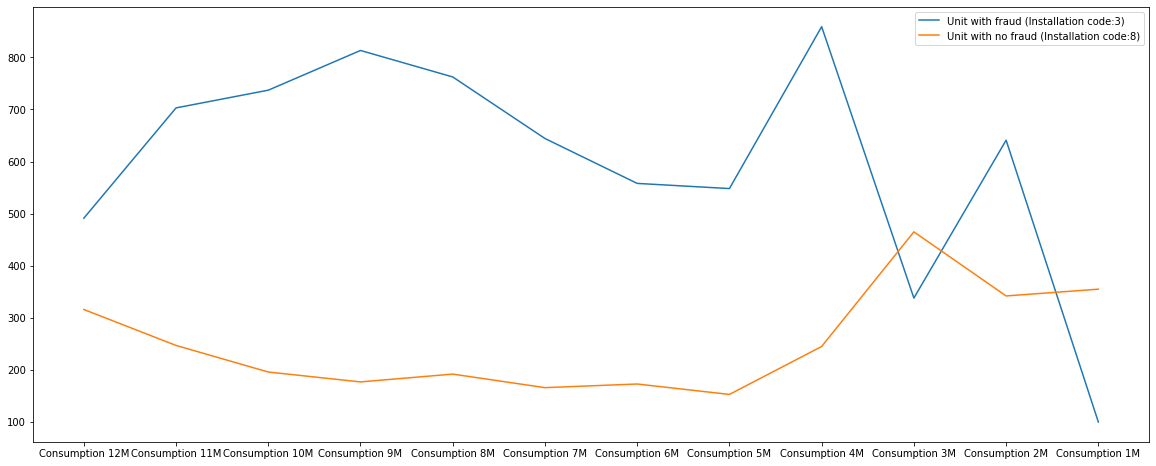

In [ ]:
# Plotting Consumptions for single-phase fraud and no fraud examples
plt.figure(figsize = (20,8))
plt.plot(fraud_consumptions_1_phase[consumptions_columns],
         label = 'Unit with fraud (Installation code:' + fraud_consumptions_1_phase['Instalation Code'].astype(str)+ ')')
plt.plot(no_fraud_consumptions_1_phase[consumptions_columns],
         label = 'Unit with no fraud (Installation code:' + no_fraud_consumptions_1_phase['Instalation Code'].astype(str)+ ')')
plt.legend()
# plt.title('Consumo dos últimos 12 meses para exemplos com sistema monofásico com fraude e sem fraude detectada')
# plt.savefig('consumptions_inspresults_singphase_exs.png', transparent = True)


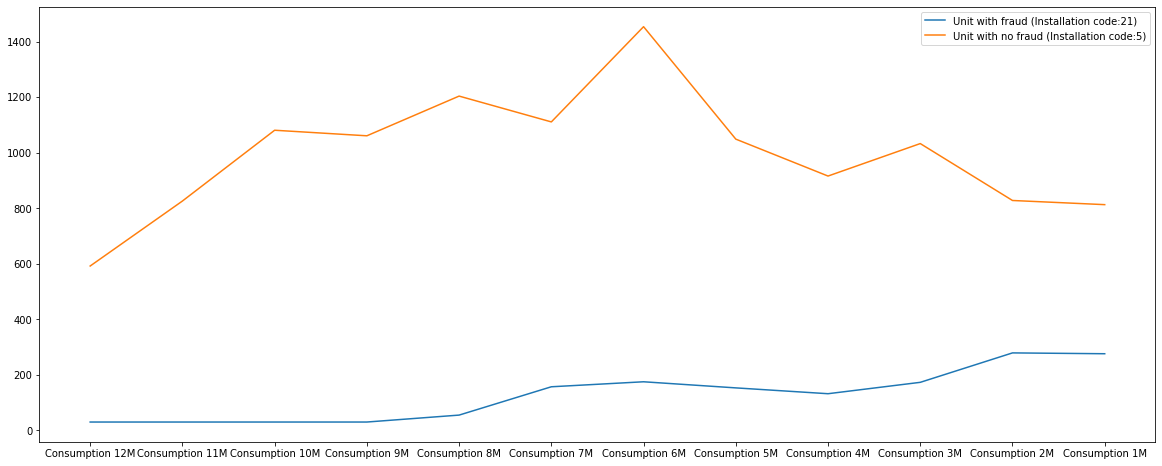

In [ ]:
# Plotting Consumptions for two-phase fraud and no fraud examples
plt.figure(figsize = (20,8))
plt.plot(fraud_consumptions_2_phase[consumptions_columns],
         label = 'Unit with fraud (Installation code:' + fraud_consumptions_2_phase['Instalation Code'].astype(str)+ ')')
plt.plot(no_fraud_consumptions_2_phase[consumptions_columns],
         label = 'Unit with no fraud (Installation code:' + no_fraud_consumptions_2_phase['Instalation Code'].astype(str)+ ')')
# plt.xticks(ticks = consumptions_columns, labels = ['12M','11M','10M','9M','8M','7M','6M','5M','4M','3M','2M','1M'])
plt.legend()
# plt.title('Consumo dos últimos 12 meses para exemplos com sistema bifásico com fraude e sem fraude detectada')
# plt.savefig('consumptions_inspresults_doublephase_exs.png', transparent = True)

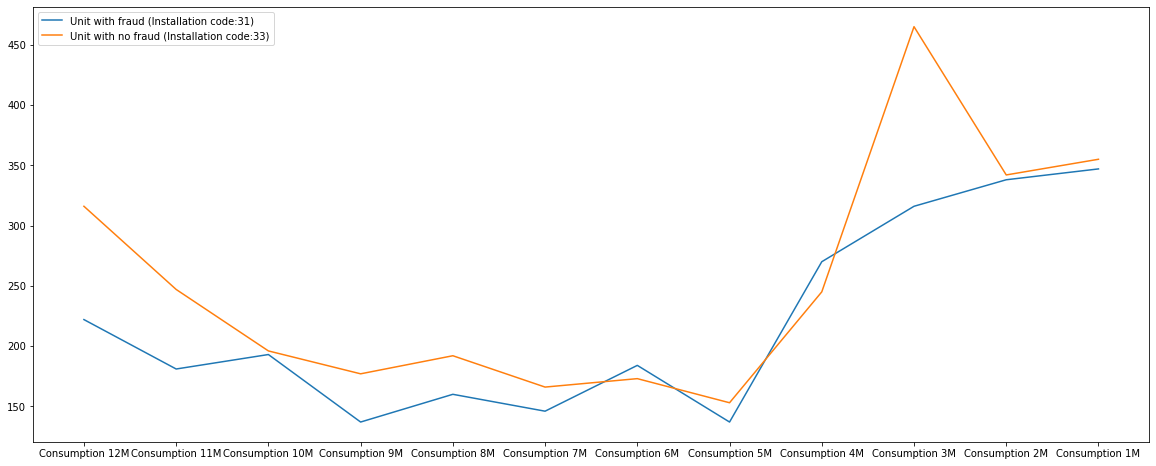

In [ ]:
# Plotting Consumptions for single-phase fraud and no fraud examples
plt.figure(figsize = (20,8))
plt.plot(fraud_consumptions_3_phase[consumptions_columns],
         label = 'Unit with fraud (Installation code:' + fraud_consumptions_3_phase['Instalation Code'].astype(str)+ ')')
plt.plot(no_fraud_consumptions_1_phase[consumptions_columns],
         label = 'Unit with no fraud (Installation code:' + no_fraud_consumptions_3_phase['Instalation Code'].astype(str)+ ')')
plt.legend()
# plt.title('Consumo dos últimos 12 meses para exemplos com sistema trifásico com fraude e sem fraude detectada')
# plt.savefig('consumptions_inspresults_threephase_exs.png', transparent = True)

The observation of these individual cases did not bring any useful insight on the difference of consumptions between fraud and no fraud units.

Let's make a more general analysis.

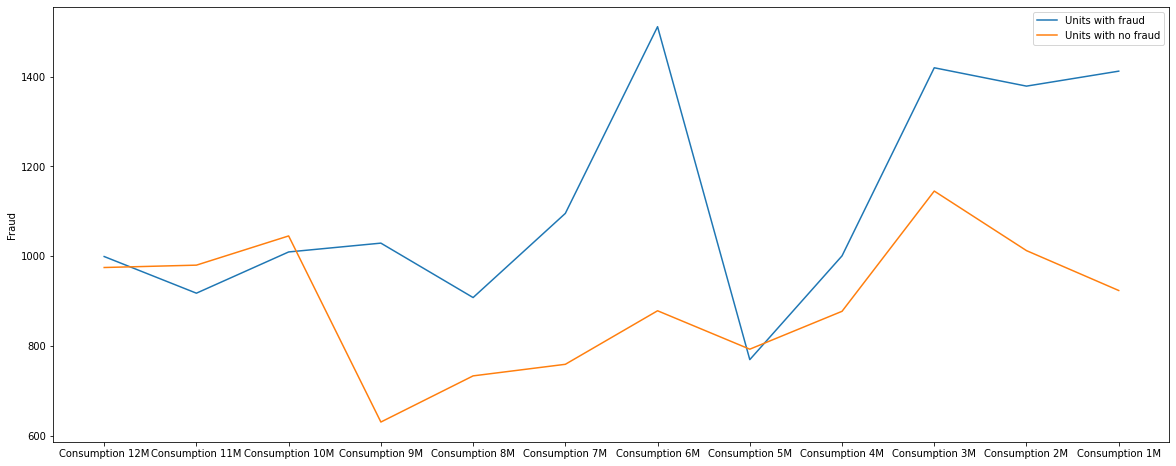

In [ ]:
# Averages
consumption_averages_by_fraud = df.groupby('Inspection Results').mean()
plt.figure(figsize = (20,8))
sns.lineplot(y = consumption_averages_by_fraud.loc['Fraud'][consumptions_columns], x = consumptions_columns, label = 'Units with fraud')
sns.lineplot(y = consumption_averages_by_fraud.loc['No Fraud'][consumptions_columns], x = consumptions_columns, label = 'Units with no fraud')
plt.legend()
# plt.title('Consumo médio de unidades com fraude e sem fraude detectada')
# plt.savefig('consumptions_inspresults_avgs.png', transparent = True)

On average, it really seems that the curve corresponding to consumption of units with fraud has more more abrupt decrease than the one for units with no fraud. 

Now, let's take a look on the distributions of consumptions for each month

In [ ]:
# Creating dictionary for relabling columns in the boxplots:
consumptions_dict = {}
for i in range(1,13):
    consumptions_dict['Consumption ' + str(i) +'M'] = str(i)+'M'
consumptions_dict

{'Consumption 10M': '10M',
 'Consumption 11M': '11M',
 'Consumption 12M': '12M',
 'Consumption 1M': '1M',
 'Consumption 2M': '2M',
 'Consumption 3M': '3M',
 'Consumption 4M': '4M',
 'Consumption 5M': '5M',
 'Consumption 6M': '6M',
 'Consumption 7M': '7M',
 'Consumption 8M': '8M',
 'Consumption 9M': '9M'}

Text(0.5, 1.0, 'Distributions of consumptions for each month by units with no fraud')

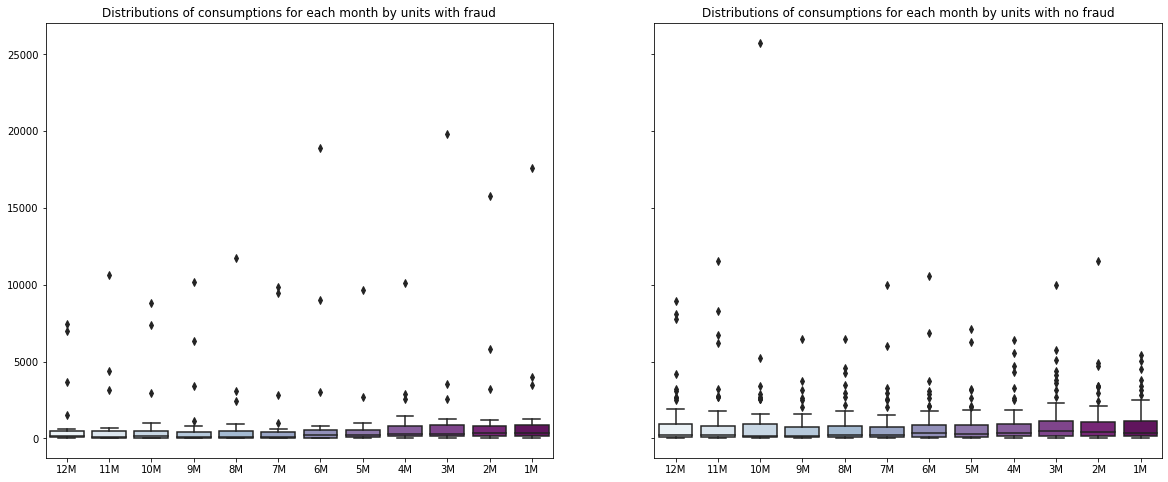

In [ ]:
fig, axes = plt.subplots(1,2, sharey=True, figsize = (20,8))

sns.boxplot(ax = axes[0],
            data=df[df['Inspection Results'] == 'Fraud'][consumptions_columns].rename(columns = consumptions_dict),
            showfliers = True,
            palette = 'BuPu').set_title('Distributions of consumptions for each month by units with fraud')

sns.boxplot(ax = axes[1],
            data=df[df['Inspection Results'] == 'No Fraud'][consumptions_columns].rename(columns = consumptions_dict),
            showfliers=True,
            palette = 'BuPu').set_title('Distributions of consumptions for each month by units with no fraud')
# plt.savefig('consumptions_boxplots_outliers.png', transparent = True)


Text(0.5, 1.0, 'Distributions of consumptions for each month by units with no fraud (outliers removed)')

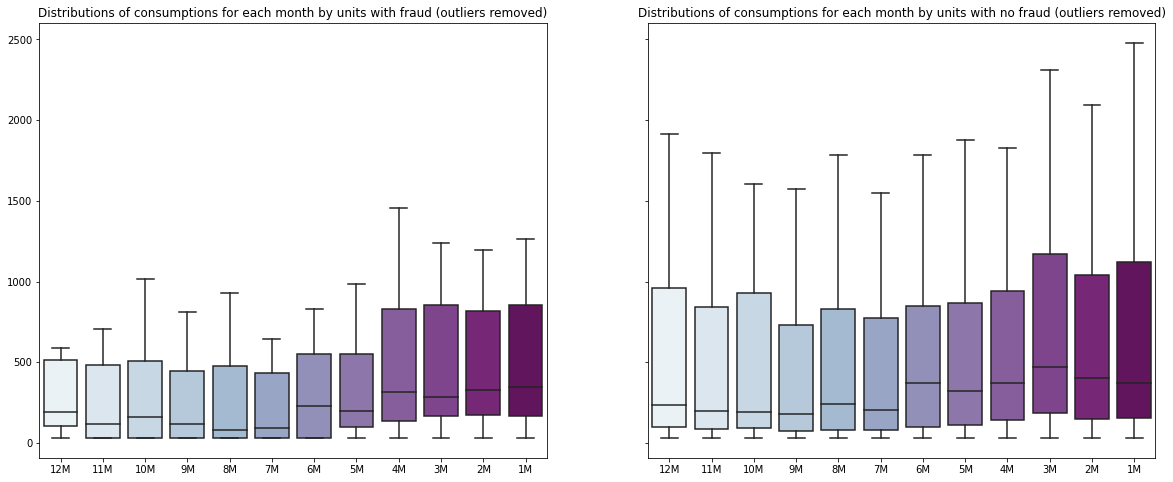

In [ ]:
fig, axes = plt.subplots(1,2, sharey=True, figsize = (20,8))

sns.boxplot(ax = axes[0],
            data=df[df['Inspection Results'] == 'Fraud'][consumptions_columns].rename(columns = consumptions_dict),
            showfliers = False, 
            palette = 'BuPu').set_title('Distributions of consumptions for each month by units with fraud (outliers removed)')


sns.boxplot(ax = axes[1],
            data=df[df['Inspection Results'] == 'No Fraud'][consumptions_columns].rename(columns = consumptions_dict),
            showfliers=False,
            palette = 'BuPu').set_title('Distributions of consumptions for each month by units with no fraud (outliers removed)')

# plt.savefig('cons|umptions_boxplots_no_outliers.png', transparent = True)


Now, let's analyze the occurrences of frauds according to classes and phases.

In [ ]:
# # Translating some ccategorical columns
# df_translated = df[['Inspection Results', 'Class', 'Phase', 'Location']].copy().rename(columns = {'Inspection Results': 'Resultados da inspeção',
#                                                                                                   'Class': 'Classe',
#                                                                                                   'Phase': 'Fase',
#                                                                                                   'Location':'Localidade'})
# df_translated['Resultados da inspeção'] = df_translated['Resultados da inspeção'].apply(lambda x: {'Fraud':'Fraude', 'No Fraud': 'Sem Fraude'}[x])
# df_translated['Fase'] = df_translated['Fase'].apply(lambda x: {'1 Phase': 'Monofásico', '2 Phase': 'Bifásico', '3 Phase': 'Trifásico'}[x])
# df_translated['Classe'] = df_translated['Classe'].apply(lambda x: {'Residential': 'Residencial', 'Commercial': 'Comercial'}[x])
# df_translated.head()

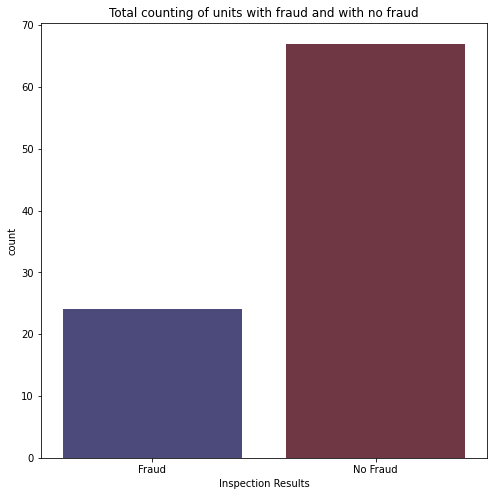

In [ ]:
plt.figure(figsize=(8,8))
fig = sns.countplot(x=df['Inspection Results'], palette = 'icefire')
plt.title('Total counting of units with fraud and with no fraud')
plt.savefig('inspection_results_barplot.png', transparent = True)

Text(0.5, 1.0, 'Units with fraud and no fraud separated by class')

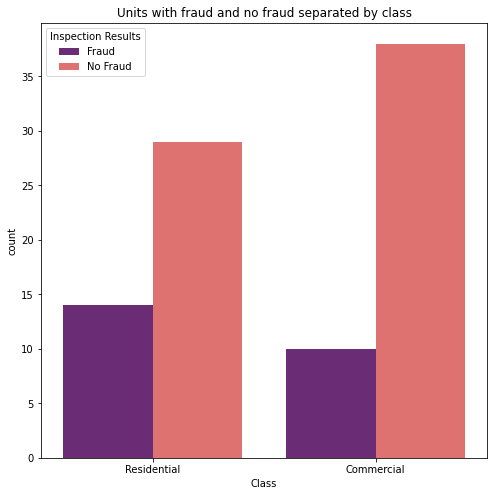

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Class', hue = 'Inspection Results', data = df, palette = 'magma')
plt.title('Units with fraud and no fraud separated by class')
# plt.savefig('inspection_results_class_barplot.png', transparent = True)

The above plot shows that residential units have proportionally more fraud occurrences than commercial units.

Text(0.5, 1.0, 'Units with fraud and no fraud separated by phase')

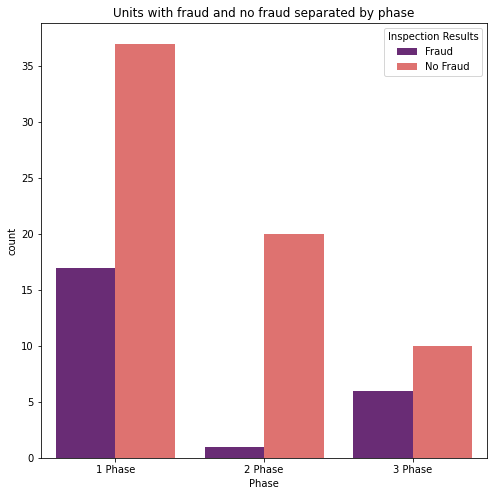

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Phase', hue = 'Inspection Results', data = df, palette = 'magma')
plt.title('Units with fraud and no fraud separated by phase')
# plt.savefig('inspection_results_phase_barplot.png', transparent = True)

The above plot shows that two-phase installations have proportionally less occurrences than one-phase and three-phase instalations. The order of frequences of fraud is 
three-phase > single-phase > two-phase

Text(0.5, 1.0, 'Inspection results of commercial units separated by phase')

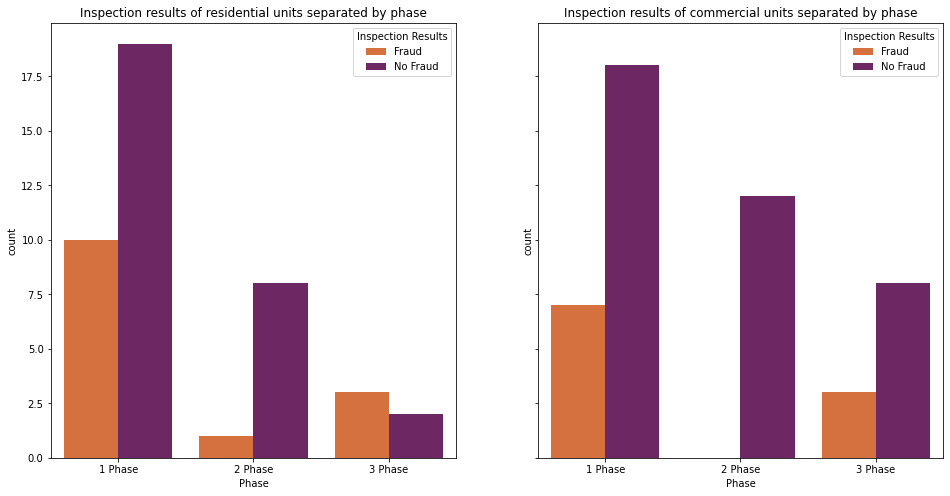

In [ ]:
# Selecting a slice of the dataframe with only residential units and another with only commercial units
residential_units = df[df['Class']=='Residential']
commercial_units = df[df['Class']=='Commercial']

# Generating two separate plots of Inspection Results for each class type
fig, axes = plt.subplots(1,2, sharey=True, figsize = (16,8))
sns.countplot(ax = axes[0],
              data = residential_units,
              x = 'Phase' ,hue = 'Inspection Results',
              palette = 'inferno_r').set_title('Inspection results of residential units separated by phase')
sns.countplot(ax = axes[1],
              data = commercial_units,
              x = 'Phase',
              hue = 'Inspection Results',
              palette = 'inferno_r').set_title('Inspection results of commercial units separated by phase')
# plt.savefig('inspection_results_class_phase_barplots.png', transparent = True)

The above graph suggests that, for one-phase and two-phase installations, residential and commercial units give similar contributions for the number of frauds. Whereas for the three-phase installations, the frequence of frauds is considerably greater for residential units than for comercial units.

From the above graphs, we can take the following conclusions:

* The number of units with frauds is almost always proportionally small in comparison to the number of units with no frauds. This happens even if we separately look at different values of ```Class``` and ```Phase```;
* The only case where the number of fraud occurrences is not considerably smaller than the number of non-fraud units is in the case of three-phase residential units, in which both groups have small number of occurrences. This is not statistically significant to infer that the opposite indeed occurs in this case, so I assume that the small proportion fraud/non-fraud is general and independent of the variables ```Class``` and ```Phase```;
* Despite the pattern of the frequence of fraud occurrences being almost always smaller than the frequence of non-fraud occurrences, the variable ```Class``` and ```Phase``` seems to determine the magnitude of such differences;

These points give us enough reason for using such variables in future models.

Now, let's evaluate the cases in each ```Location```.

Text(0.5, 1.0, 'Total count of units by location')

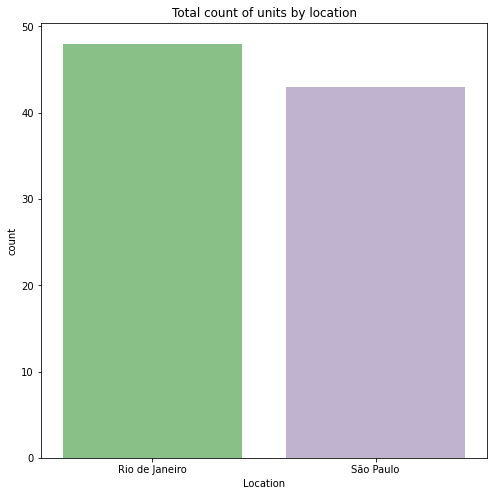

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'Location', palette = 'Accent')
plt.title('Total count of units by location')
# plt.savefig('location_barplot.png', transparent = True)

Text(0.5, 1.0, 'Inspection results count by location')

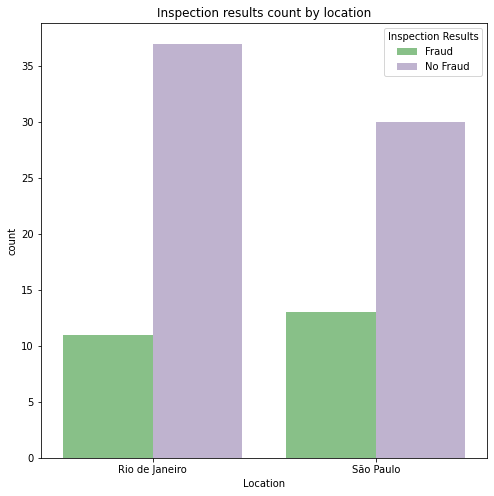

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'Location', palette = 'Accent', hue = 'Inspection Results')
plt.title('Inspection results count by location')
# plt.savefig('inspection_results_location_barplot.png', transparent = True)

In [ ]:
df[df['Location']=='Rio de Janeiro']['Inspection Results'].value_counts(normalize=True)

No Fraud    0.770833
Fraud       0.229167
Name: Inspection Results, dtype: float64

In [ ]:
df[df['Location']=='São Paulo']['Inspection Results'].value_counts(normalize=True)

No Fraud    0.697674
Fraud       0.302326
Name: Inspection Results, dtype: float64

The unballance of the data also occurs in each location individually with similar proportions in the locations. This makes us not to use such variable for future models of fraud detection. 





## Fraud probability rate evaluation

Now, we need to analyze the accuracy of the model 

In [ ]:
df[['Inspection Results','Fraud Probability Rate']].value_counts().sort_index()

Inspection Results  Fraud Probability Rate
Fraud               0.1                        8
                    0.2                        3
                    0.3                        1
                    0.4                        2
                    0.5                        3
                    0.7                        2
                    0.8                        1
                    0.9                        4
No Fraud            0.1                       33
                    0.2                       13
                    0.3                        4
                    0.4                        5
                    0.5                        1
                    0.6                        2
                    0.7                        1
                    0.8                        5
                    0.9                        3
dtype: int64

The above numbers indicate that the probability rate providade by model is not good, as there is a considerable amount of detected frauds with low probability rate given by the model. Let's analyze it using adequate evaluation metrics.

In [ ]:
df['Predictions'] = df['Fraud Probability Rate'].apply(lambda x: 'Fraud' if x >=0.5 else 'No Fraud')

In [ ]:
df['Fraud Probability Rate']

0     0.5
1     0.2
2     0.6
3     0.4
4     0.1
     ... 
86    0.2
87    0.1
88    0.1
89    0.1
90    0.2
Name: Fraud Probability Rate, Length: 91, dtype: float64

Let's create another dataframe containing only the predictions and the inspection results with numerical data.

In [ ]:
predictions_results = df[['Predictions', 'Inspection Results']].copy()
predictions_results['Predictions'] = predictions_results['Predictions'].apply(lambda x: 0 if x=='No Fraud' else 1)
predictions_results['Inspection Results'] = predictions_results['Inspection Results'].apply(lambda x: 0 if x=='No Fraud' else 1)

In [ ]:
predictions_results

,Predictions,Inspection Results
0,1,1
1,0,0
2,1,0
3,0,1
4,0,0
...,...,...
86,0,0
87,0,0
88,0,0
89,0,0


Let's take a look in the number of occurrences for each case

In [ ]:
predictions_results.value_counts()

Predictions  Inspection Results
0            0                     55
             1                     14
1            0                     12
             1                     10
dtype: int64

Now, let's construct the proper confusion matrix for this case to have an adequate notion of the model's performance.

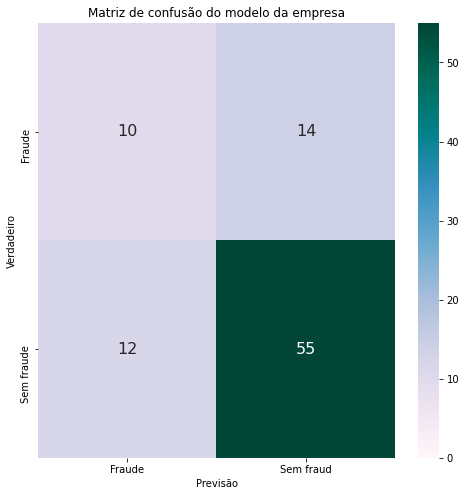

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = predictions_results['Inspection Results']
y_pred = predictions_results['Predictions']

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_true, y_pred, labels = [1,0]),
            vmin=0,
            annot=True,
            cmap='PuBuGn',
            annot_kws={"size": 16},
            xticklabels=['Fraude', 'Sem fraud'],yticklabels=['Fraude', 'Sem fraude'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsão')
plt.title('Matriz de confusão do modelo da empresa')
plt.savefig('confusion_matrix_company_model.png', transparent = True)

The confusion matrix shows that the model has a good performance on the correct classifying non-frauds, but it has a very low performance on classifying frauds, which is the main purpose of the model. Let's evaluate some other metrics to confirm this.

We will use the precision, recall and F1-score to evaluate the model's performance.

The precision is defined as $p = \frac{TP}{TP+FP} $ and is associated with the ability of the classifier not to label as positive a sample that is negative.

The recall is defined as $r = \frac{TP}{TP + FN} $ and is associated with the ability of the classifier to find all the positive samples.

Finally, F1-score is a measure that considers both the precision and recall to evaluate the accuracy with a single measure. It is defined as
$F1 = 2 \cdot \displaystyle{\frac{p r}{p + r}}$.

The best case scenario happens when both precision and recall are high for both classes, but a satisfying case already happens when the recall is great for the cases of frauds (a high recall means that the model is good on detecting every fraud, even though it can misclassify some non-frauds as frads).

In [ ]:
from sklearn.metrics import f1_score
print('F1-score: ', f1_score(y_true, y_pred, labels=[1,0]))

F1-score:  0.43478260869565216


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print(' Inspection results:              Fraud            |         No Fraud', '\n',
      'Precision:          ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[0][0], '       ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[0][1], '\n '
      'Recall:             ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[1][0], '        ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[1][1], '\n '
      'F1-score:           ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[2][0], '       ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[2][1]) 


 Inspection results:              Fraud            |         No Fraud 
 Precision:           0.45454545454545453         0.7971014492753623 
 Recall:              0.4166666666666667          0.8208955223880597 
 F1-score:            0.43478260869565216         0.8088235294117647


This analysis shows us that the model indeed works relatively well on the cases with no fraud, but is worst than random guessing (50% chance) to detect units with fraud, which is the main objective of the model.

## Data preparation for model development

Before proposing other models for fraud detection, we must prepare the data properly to feed the future models.

Despite other minor things, one important procedure we will take is to ballance the data according to the variable ```Inspection Results```, as the number of frauds is considerably smaller than the number of non-frauds, which has the potential of making the models biased to only work well on the non-frauds, while not working well in the frauds (which is the main purpose of this work).

We begin by constructing a properly formatted dataframe from the original one, with only numeric entries.

In [ ]:
df.columns # Lists the columns of the original dataframe

Index(['Instalation Code', 'Location', 'Class', 'Phase',
       'Fraud Probability Rate', 'Consumption 12M', 'Consumption 11M',
       'Consumption 10M', 'Consumption 9M', 'Consumption 8M', 'Consumption 7M',
       'Consumption 6M', 'Consumption 5M', 'Consumption 4M', 'Consumption 3M',
       'Consumption 2M', 'Consumption 1M', 'Inspection Results',
       'Predictions'],
      dtype='object')

In [ ]:
# Creating a copy of the dataframe that contains only the columns that were chosen to be used, numerically formated

formatted_df = df.drop(labels = ['Fraud Probability Rate', 'Instalation Code', 'Location', 'Predictions'],
                       axis=1).copy() # constructing new dataframe to be freely manipulated and removing unnecessary columns
formatted_df.head() # Displaying the resulting dataframe

,Class,Phase,Consumption 12M,Consumption 11M,Consumption 10M,Consumption 9M,Consumption 8M,Consumption 7M,Consumption 6M,Consumption 5M,Consumption 4M,Consumption 3M,Consumption 2M,Consumption 1M,Inspection Results
0,Residential,1 Phase,491.172,702.916,736.914,813.144,762.324,644.2,558.0,548.092,858.788,337.958,640.952,100.0,Fraud
1,Residential,2 Phase,592.000,826.000,1081.000,1061.000,1204.000,1111.0,1454.0,1049.000,916.000,1033.000,828.000,813.0,No Fraud
2,Residential,2 Phase,50.000,50.000,50.000,50.000,50.000,50.0,524.0,166.000,372.000,314.000,455.000,293.0,No Fraud
3,Residential,1 Phase,30.000,30.000,30.000,30.000,30.000,30.0,721.0,721.000,721.000,450.000,450.000,1262.0,Fraud
4,Residential,1 Phase,316.000,247.000,196.000,177.000,192.000,166.0,173.0,153.000,245.000,465.000,342.000,355.0,No Fraud


In [ ]:
# Transforming columns with categories in string format to binary columns using one-hot encoding

formatted_df = pd.get_dummies(data = formatted_df, prefix_sep = ' - ' , columns = ['Class', 'Phase', 'Inspection Results'])

In [ ]:
formatted_df.head()

,Consumption 12M,Consumption 11M,Consumption 10M,Consumption 9M,Consumption 8M,Consumption 7M,Consumption 6M,Consumption 5M,Consumption 4M,Consumption 3M,Consumption 2M,Consumption 1M,Class - Commercial,Class - Residential,Phase - 1 Phase,Phase - 2 Phase,Phase - 3 Phase,Inspection Results - Fraud,Inspection Results - No Fraud
0,491.172,702.916,736.914,813.144,762.324,644.2,558.0,548.092,858.788,337.958,640.952,100.0,0,1,1,0,0,1,0
1,592.000,826.000,1081.000,1061.000,1204.000,1111.0,1454.0,1049.000,916.000,1033.000,828.000,813.0,0,1,0,1,0,0,1
2,50.000,50.000,50.000,50.000,50.000,50.0,524.0,166.000,372.000,314.000,455.000,293.0,0,1,0,1,0,0,1
3,30.000,30.000,30.000,30.000,30.000,30.0,721.0,721.000,721.000,450.000,450.000,1262.0,0,1,1,0,0,1,0
4,316.000,247.000,196.000,177.000,192.000,166.0,173.0,153.000,245.000,465.000,342.000,355.0,0,1,1,0,0,0,1


In [ ]:
# Manually removing one column for each categorical variable
formatted_df.drop(labels = ['Class - Commercial', 'Phase - 3 Phase', 'Inspection Results - No Fraud'], axis = 1, inplace = True)

In [ ]:
formatted_df.head()

,Consumption 12M,Consumption 11M,Consumption 10M,Consumption 9M,Consumption 8M,Consumption 7M,Consumption 6M,Consumption 5M,Consumption 4M,Consumption 3M,Consumption 2M,Consumption 1M,Class - Residential,Phase - 1 Phase,Phase - 2 Phase,Inspection Results - Fraud
0,491.172,702.916,736.914,813.144,762.324,644.2,558.0,548.092,858.788,337.958,640.952,100.0,1,1,0,1
1,592.000,826.000,1081.000,1061.000,1204.000,1111.0,1454.0,1049.000,916.000,1033.000,828.000,813.0,1,0,1,0
2,50.000,50.000,50.000,50.000,50.000,50.0,524.0,166.000,372.000,314.000,455.000,293.0,1,0,1,0
3,30.000,30.000,30.000,30.000,30.000,30.0,721.0,721.000,721.000,450.000,450.000,1262.0,1,1,0,1
4,316.000,247.000,196.000,177.000,192.000,166.0,173.0,153.000,245.000,465.000,342.000,355.0,1,1,0,0


The oversampling technique will work better in normalized features. We will use the MinMaxScaler to normalize the data the columns of consumptions.

The MinMaxScaler transforms the values of a feature in a way that the new values have a minimum = 0 and maximum = 1. 

For each column, we need to calculate the standard deviation $X_{std} = \frac{X - X_{min}}{X_{max} - X_{min}}$, then we re-scale the value of $X$ with $X_{scaled} = X_{std}  (max - min) + min$, where $max$ and $min$ correspond to the new maximum and minimum values, being $1$ and $0$, respectively, for our case.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_consumptions = scaler.fit_transform(formatted_df[consumptions_columns])
scaled_consumptions = pd.DataFrame(data = scaled_consumptions, columns = consumptions_columns)
formatted_df[consumptions_columns] = scaled_consumptions

In [ ]:
formatted_df.head()

,Consumption 12M,Consumption 11M,Consumption 10M,Consumption 9M,Consumption 8M,Consumption 7M,Consumption 6M,Consumption 5M,Consumption 4M,Consumption 3M,Consumption 2M,Consumption 1M,Class - Residential,Phase - 1 Phase,Phase - 2 Phase,Inspection Results - Fraud
0,0.051875,0.058362,0.027474,0.077309,0.062432,0.061853,0.027992,0.053688,0.082140,0.015546,0.038741,0.003984,1,1,0,1
1,0.063217,0.069037,0.040847,0.101777,0.100085,0.108862,0.075494,0.105596,0.087810,0.050631,0.050602,0.044565,1,0,1,0
2,0.002250,0.001735,0.000777,0.001974,0.001705,0.002014,0.026190,0.014093,0.033895,0.014336,0.026950,0.014969,1,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036634,0.071606,0.068484,0.021201,0.026633,0.070120,1,1,0,1
4,0.032171,0.018820,0.006452,0.014511,0.013811,0.013696,0.007581,0.012746,0.021308,0.021959,0.019784,0.018497,1,1,0,0


Now that we already have only numerical columns, we can properly treat the problem of unballanced data. 

As the dataframe is rather small, two reasons motivate us to choose oversampling instead of undersampling: 
* The effect of the oversampling over the computation complexity is negligible;
* The effect of an undersampling approach will have a great cost on the statistical information of the data;

The oversampling technique I choose is the Synthetic Minority Oversampling Technique (SMOTE), which construct new data for the minority category using combinations of the original data in the minority group.

In [ ]:
x_original = formatted_df[formatted_df.columns[:-1]] # Getting all columns minus Inspection Results
y_original = formatted_df[formatted_df.columns[-1]] # Getting Inspection Results
x_original.shape, y_original.shape

((91, 15), (91,))

In [ ]:
# importing library for treating unballanced data
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE(random_state = 13).fit_resample(X = x_original,y = y_original)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
resampled_df = pd.DataFrame(data = x_resampled, columns = formatted_df.columns[:-1], copy = True)
resampled_df['Inspection Results - Fraud'] = pd.Series(data = y_resampled)
resampled_df.head()

,Consumption 12M,Consumption 11M,Consumption 10M,Consumption 9M,Consumption 8M,Consumption 7M,Consumption 6M,Consumption 5M,Consumption 4M,Consumption 3M,Consumption 2M,Consumption 1M,Class - Residential,Phase - 1 Phase,Phase - 2 Phase,Inspection Results - Fraud
0,0.051875,0.058362,0.027474,0.077309,0.062432,0.061853,0.027992,0.053688,0.082140,0.015546,0.038741,0.003984,1.0,1.0,0.0,1
1,0.063217,0.069037,0.040847,0.101777,0.100085,0.108862,0.075494,0.105596,0.087810,0.050631,0.050602,0.044565,1.0,0.0,1.0,0
2,0.002250,0.001735,0.000777,0.001974,0.001705,0.002014,0.026190,0.014093,0.033895,0.014336,0.026950,0.014969,1.0,0.0,1.0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036634,0.071606,0.068484,0.021201,0.026633,0.070120,1.0,1.0,0.0,1
4,0.032171,0.018820,0.006452,0.014511,0.013811,0.013696,0.007581,0.012746,0.021308,0.021959,0.019784,0.018497,1.0,1.0,0.0,0


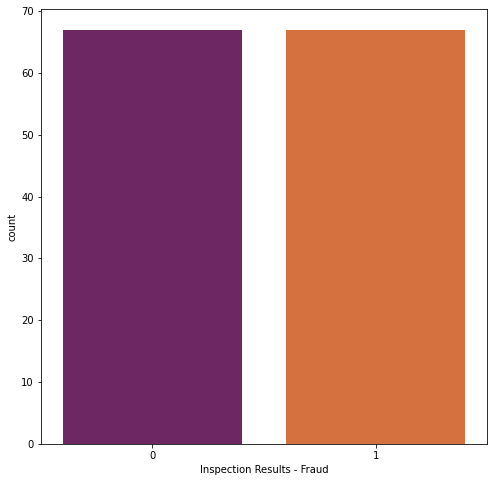

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data = resampled_df, x = 'Inspection Results - Fraud', palette = 'inferno')

We now have the re-scaled and ballanced data according to inspection results. The next step is to split the data into train and test data.

The resampling method adds the synthetic data after the original data on the dataframe. So we will use the whole dataset to train the models, but will use a test set composed by both synthetic and original data and another test set composed only by the original data.

In [ ]:
# Defining x and y variables
x_data = resampled_df[resampled_df.columns[:-1]]
y_data = resampled_df[resampled_df.columns[-1]]

In [ ]:
# Splitting data into train data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    shuffle=True, 
                                                    test_size=0.4, #Getting 40% of the whole data to use as test set
                                                    random_state = 7)  # Setting a random state to obtain always the same results                                                   

In [ ]:
# Selecting only original data to compose the test set
x_test_original, y_test_original = x_test.sort_index().loc[:92], y_test.sort_index().loc[:92]

In [ ]:
y_train.value_counts()

1    40
0    40
Name: Inspection Results - Fraud, dtype: int64

In [ ]:
y_test.value_counts()

1    27
0    27
Name: Inspection Results - Fraud, dtype: int64

In [ ]:
y_test_original.value_counts()

0    27
1     6
Name: Inspection Results - Fraud, dtype: int64

## Models proposals

Now, we will implement some other machine learning models to try to achieve better results than the model that the company already possesses.

We will start from the most simple to the more complex solutions, and will stop whenever we achieve a good F1-score for both classes.

Our first model is the Logistic regression. 

### Logistic Regression

The logistic regression model essentially maps the input variables X to a sigmoid function $\sigma (t) = \frac{e^t}{e^t+1} = \frac{1}{1+e^{-t}}$. 
The figure below ilustrates such function.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" height='200'>

It is a smooth function with $0 \leq \sigma(t) \leq 1$. The value of $\sigma(t)$ is then associated to a probability of an input data to be in one of the two categorias of a binary variable.

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X = x_train, y = y_train)
logistic_model_predictions_train = logistic_model.predict(x_train)
logistic_model_predictions = logistic_model.predict(x_test)
logistic_model_predictions_original = logistic_model.predict(x_test_original)

The confusion matrix, precision, recall and F1-scores will be evaluated multiple times from now on. This motivates us to define functions that automatically returns them.

In [ ]:
def inspection_results_confusion_matrix(y_true, y_pred, set_type = 'test', title = None, save_img = False, img_name = None):
  # This function plots the confusion matrix for Inspection Results using test data and predicted values obtained from a given model
  # Inputs: y_true - Actual values of y
  #         y_pred - Predicted values for y
  #         set_type - ('test' or 'train', default = 'test') Sets different palettes for train or test  
    color_set = {}
    color_set['train'] = 'BuPu'
    color_set['test'] = 'PuBuGn'

    plt.figure(figsize=(8,8))
    sns.heatmap(confusion_matrix(y_true, y_pred, labels = [1,0]),
                vmin=0,
                annot=True,
                cmap=color_set[set_type],
                annot_kws={"size": 16},
                xticklabels=['Fraud', 'No Fraud'],yticklabels=['Fraud', 'No Fraud'])
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.title(title)
    if save_img:
        plt.savefig(img_name, transparent = True)
    plt.show()

In [ ]:
def inspection_results_f1_precision_recal(y_true, y_pred):
    print(' Inspection results:          Fraud            |         No Fraud ', '\n',
      'Precision:          ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[0][0], '       ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[0][1], '\n '
      'Recall:             ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[1][0], '       ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[1][1], '\n '
      'F1-score:           ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[2][0], '       ', precision_recall_fscore_support(y_true, y_pred, labels=[1,0])[2][1]) 

Metrics for logistic regression model over training data:

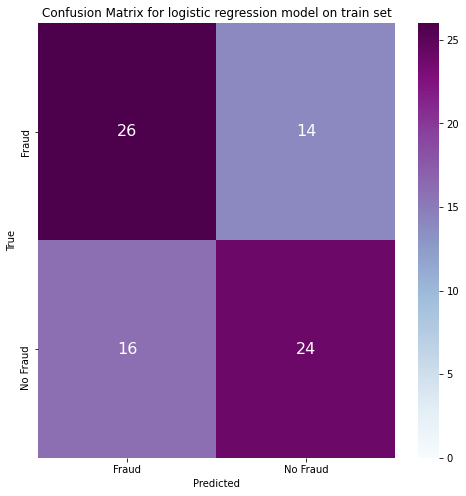

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.6190476190476191         0.631578947368421 
 Recall:              0.65         0.6 
 F1-score:            0.6341463414634146         0.6153846153846154


In [ ]:
inspection_results_confusion_matrix(y_train,
                                    logistic_model_predictions_train,
                                    'train',
                                    title = 'Confusion Matrix for logistic regression model on train set',
                                    save_img = True, img_name = 'log_mod_train_confusion_matrix.png')
inspection_results_f1_precision_recal(y_train, logistic_model_predictions_train)

Even for the training data, the logistic model did not acchieve a good performance, having an overall description of ~60% for each group. Let's see the performance over the test sets. 

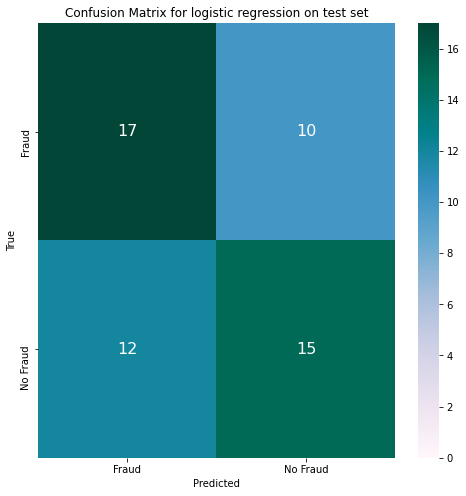

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5862068965517241         0.6 
 Recall:              0.6296296296296297         0.5555555555555556 
 F1-score:            0.6071428571428571         0.576923076923077


In [ ]:
# Evaluating model for test set containing synthetic and original data
inspection_results_confusion_matrix(y_test,
                                    logistic_model_predictions,
                                    title = 'Confusion Matrix for logistic regression on test set',
                                    save_img = True,
                                    img_name = 'log_mod_test_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test, logistic_model_predictions)

On the test set containing both synthetic and original data, the logistic regression model had almost the same performance in comparison to the training set. 

Let's evaluate it on the test set containing only original data.

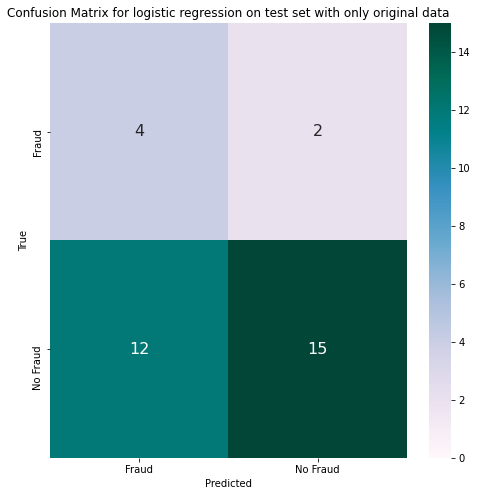

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.25         0.8823529411764706 
 Recall:              0.6666666666666666         0.5555555555555556 
 F1-score:            0.36363636363636365         0.6818181818181819


In [ ]:
inspection_results_confusion_matrix(y_test_original, logistic_model_predictions_original,
                                    title = 'Confusion Matrix for logistic regression on test set with only original data',
                                    save_img = True,
                                    img_name = 'log_mod_test_original_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test_original, logistic_model_predictions_original)

Over the test set containing only the original data, the model had a not good overall performance over the "No Fraud" group, while having a terrible performance over the "Fraud" group.

The recall over the "Fraud" group is not bad, but the low precision shows that the model is bad for correctly labeling of the frauds, which means that it can be useful for detecting more than 50% of the actual frauds, but the cost is that it misclassify many non-frauds as frauds. 

This generates a possibly avoidable cost to the company, that would have to verify a great number of units to detect only a small portion of actual frauds. In this case, it would be necessary to inspect 16 units to discover that only 4 of them are actual frauds. And still, 2 fraud units would be missing.

The logistic regression model is affected by multicollinearity, which occurs when the variables ```x``` contain some correlated variables. I did not make a careful analysis of the correlation between the variables, but this problem can be avoided when making use of algorithms like Decision Trees.

We will now try another model to see if we can achieve a good recall on the Frauds, and better precision. The model we choose now is a Decision Tree.

### Decision Tree

A decision tree model is represented by a flowchart that goes from one feature to others, splitting the data into different categories depending on their values for each feature.

The following image ilustrates the structure of a decision tree.

<img src="" height = 200>

Each node level represents a feature and each split represents the different groups of similarity according to that feature.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', # Consider the entropy as criterion for measuring information gain
                                             splitter = 'best', random_state=8) # Consider the best choices of splits
                                              
decision_tree_model.fit(X = x_train, y = y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8, splitter='best')

In [ ]:
dt_predictions_train = decision_tree_model.predict(x_train)
dt_predictions = decision_tree_model.predict(x_test)
dt_predictions_original = decision_tree_model.predict(x_test_original)

Let's evaluate the performance of the decision tree model over the train data.

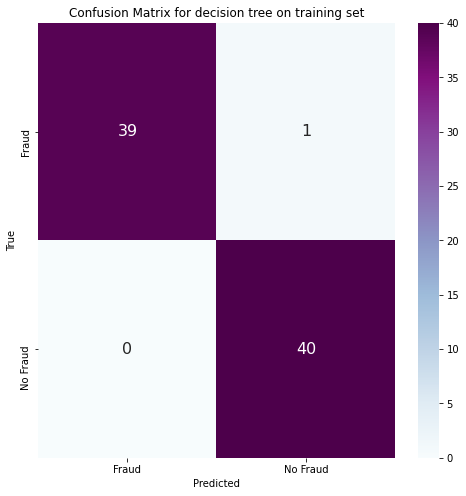

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543


In [ ]:
inspection_results_confusion_matrix(y_train, dt_predictions_train, 'train',
                                    title = 'Confusion Matrix for decision tree on training set',
                                    save_img = True,
                                    img_name = 'dec_tree_training_confusion_matrix.png')
inspection_results_f1_precision_recal(y_train, dt_predictions_train)

The model had an extremely high performance over the train data, indicating the possibility of overfitting.

Let's evaluate its performance over the test set with synthetic and original data and verify if the overfit indeed occurs.

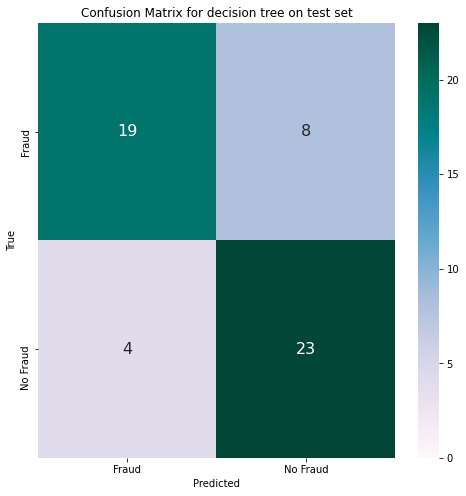

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621


In [ ]:
inspection_results_confusion_matrix(y_test, dt_predictions,
                                    title = 'Confusion Matrix for decision tree on test set',
                                    save_img = True,
                                    img_name = 'dec_tree_test_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test, dt_predictions)

Now, let's evaluate the performance over the test set containing only the original data

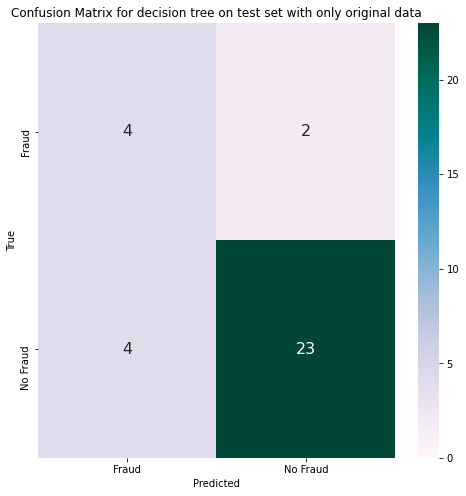

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5         0.92 
 Recall:              0.6666666666666666         0.8518518518518519 
 F1-score:            0.5714285714285715         0.8846153846153846


In [ ]:
inspection_results_confusion_matrix(y_test_original, dt_predictions_original,
                                    title = 'Confusion Matrix for decision tree on test set with only original data',
                                    save_img = True,
                                    img_name = 'dec_tree_test_original_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test_original, dt_predictions_original)

Overfitting indeed occurred in this model. Let's implement some conditions to try to regularize the model by limitting the maximum depth of the trees and see if this solves the overfitting problem.


 Max depth =  1


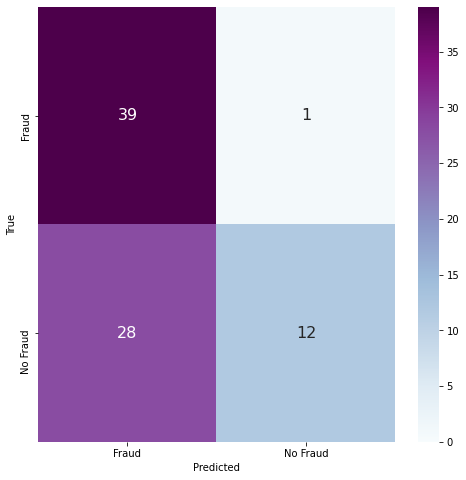

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.582089552238806         0.9230769230769231 
 Recall:              0.975         0.3 
 F1-score:            0.7289719626168225         0.4528301886792453


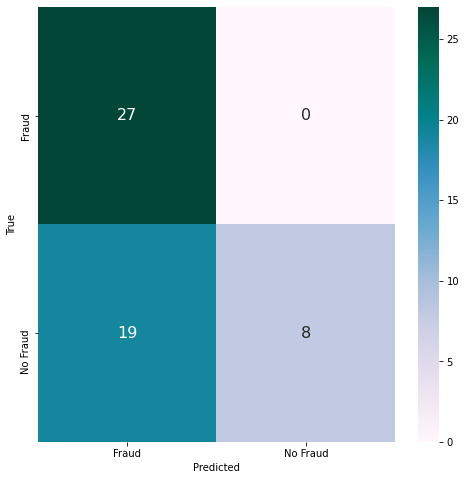

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5869565217391305         1.0 
 Recall:              1.0         0.2962962962962963 
 F1-score:            0.7397260273972603         0.45714285714285713

 Max depth =  2


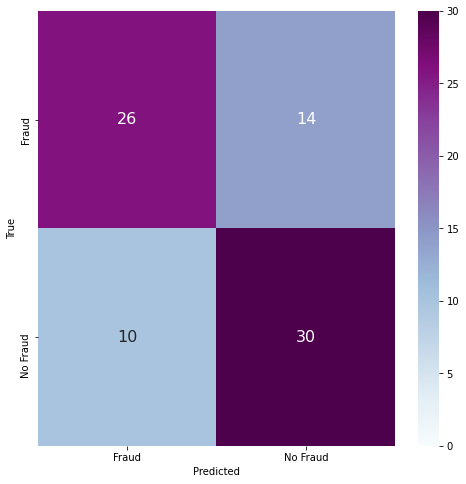

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.7222222222222222         0.6818181818181818 
 Recall:              0.65         0.75 
 F1-score:            0.6842105263157895         0.7142857142857143


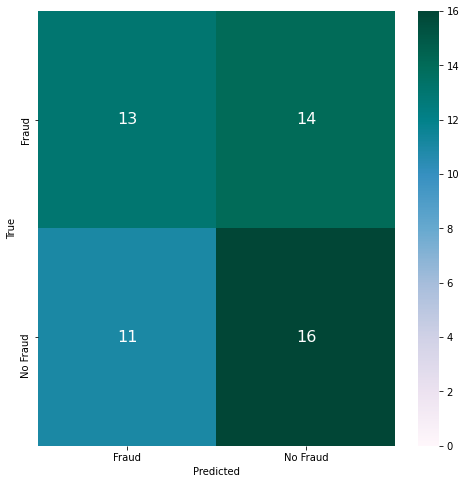

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5416666666666666         0.5333333333333333 
 Recall:              0.48148148148148145         0.5925925925925926 
 F1-score:            0.5098039215686274         0.5614035087719299

 Max depth =  3


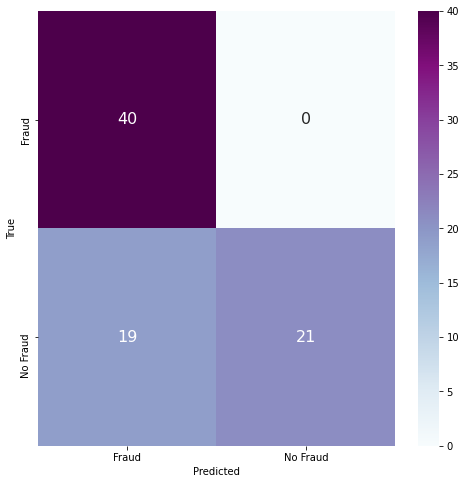

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.6779661016949152         1.0 
 Recall:              1.0         0.525 
 F1-score:            0.8080808080808081         0.6885245901639345


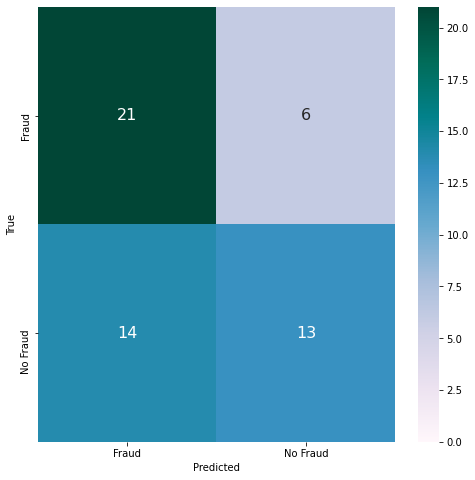

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.6         0.6842105263157895 
 Recall:              0.7777777777777778         0.48148148148148145 
 F1-score:            0.6774193548387097         0.5652173913043478

 Max depth =  4


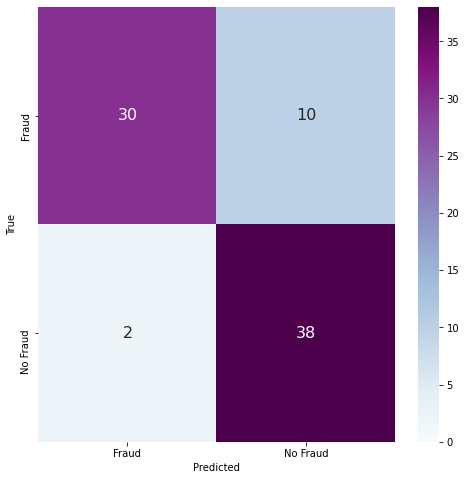

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.9375         0.7916666666666666 
 Recall:              0.75         0.95 
 F1-score:            0.8333333333333334         0.8636363636363635


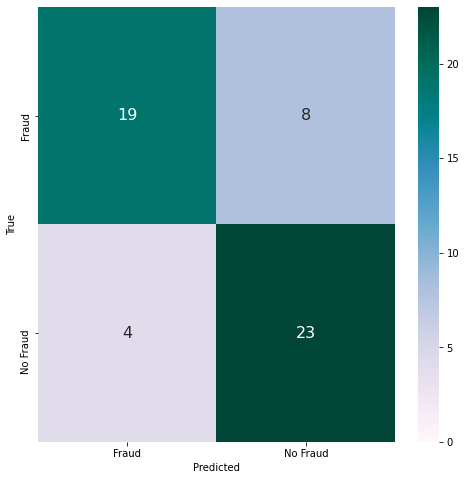

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Max depth =  5


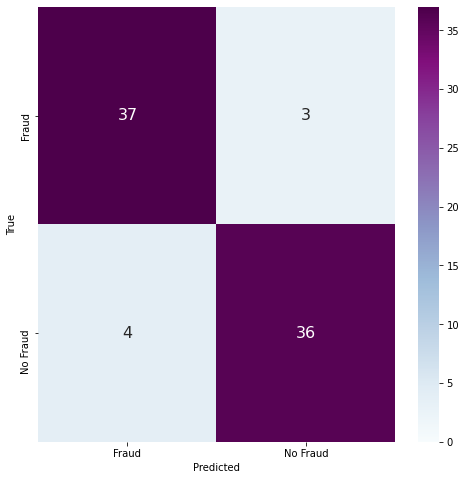

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.9024390243902439         0.9230769230769231 
 Recall:              0.925         0.9 
 F1-score:            0.9135802469135802         0.9113924050632911


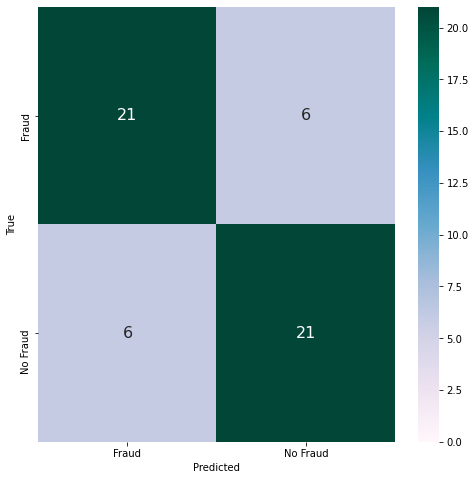

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.7777777777777778         0.7777777777777778 
 Recall:              0.7777777777777778         0.7777777777777778 
 F1-score:            0.7777777777777778         0.7777777777777778

 Max depth =  6


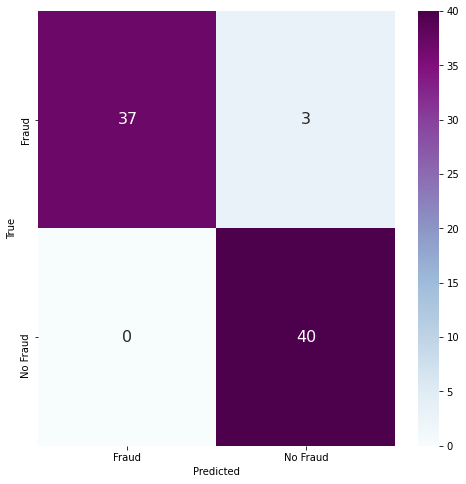

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.9302325581395349 
 Recall:              0.925         1.0 
 F1-score:            0.961038961038961         0.963855421686747


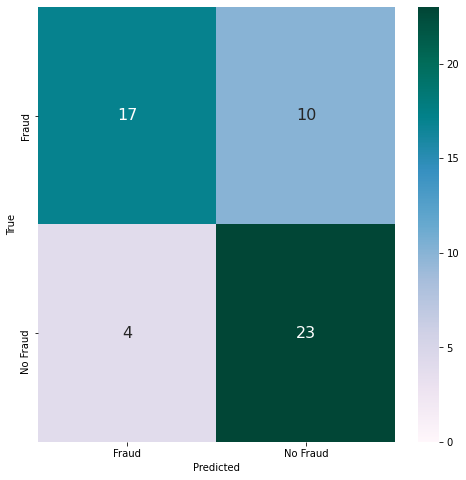

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8095238095238095         0.696969696969697 
 Recall:              0.6296296296296297         0.8518518518518519 
 F1-score:            0.7083333333333334         0.7666666666666667

 Max depth =  7


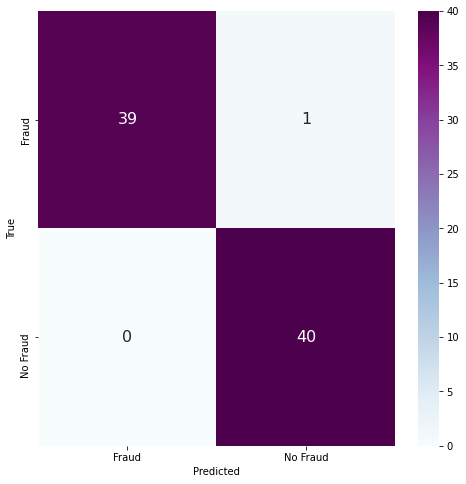

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543


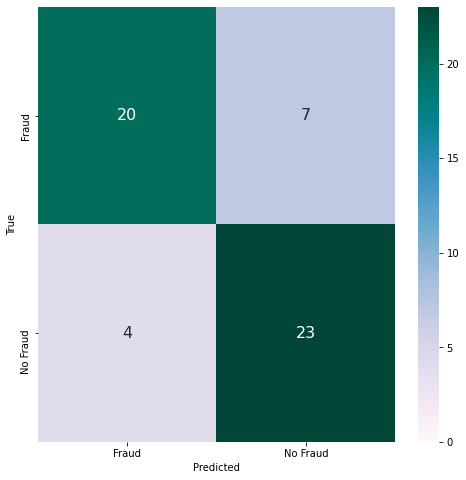

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8333333333333334         0.7666666666666667 
 Recall:              0.7407407407407407         0.8518518518518519 
 F1-score:            0.7843137254901961         0.8070175438596491

 Max depth =  8


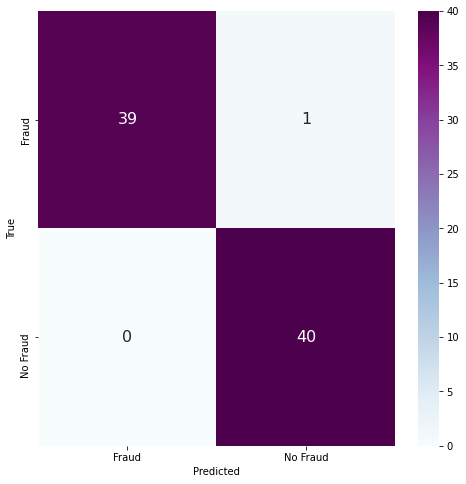

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543


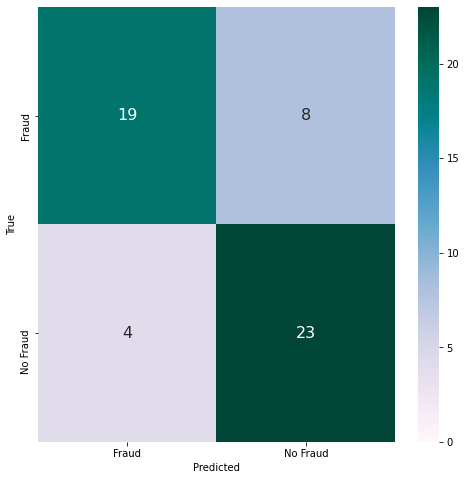

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Max depth =  9


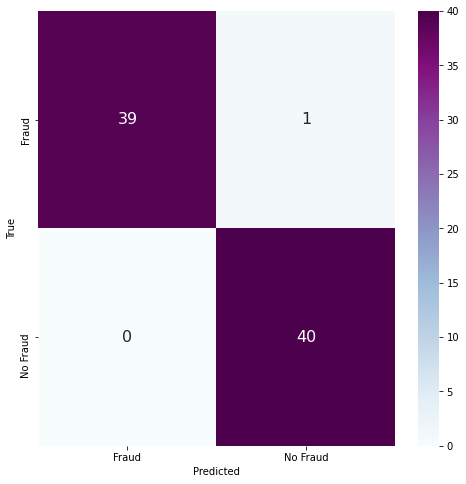

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543


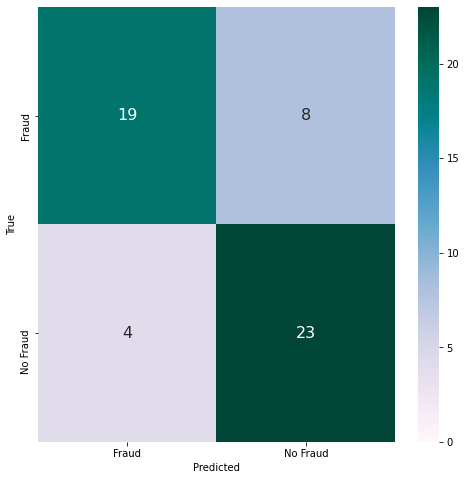

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Max depth =  10


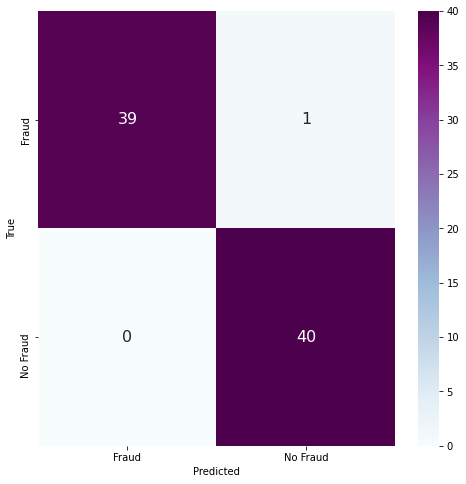

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543


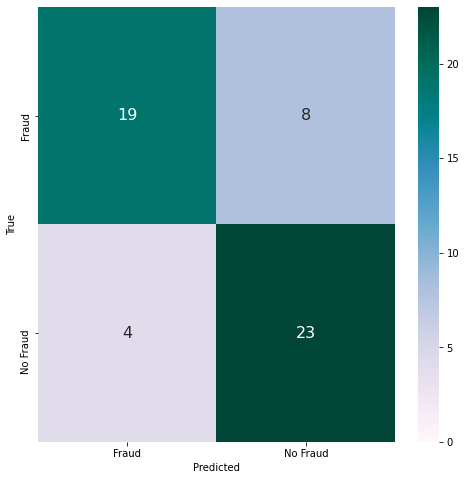

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621


In [ ]:
max_depths = list(range(1,11))
max_depths

for depth in max_depths:
    # Constructing decision trees varying max_depth values
    decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', # Consider the entropy as criterion for measuring information gain
                                                splitter = 'best', # Consider the best choices of splits
                                                random_state = 8, 
                                                max_depth = depth) 
                                                  
    decision_tree_model.fit(X = x_train, y = y_train)

    dt_predictions_train = decision_tree_model.predict(x_train)
    dt_predictions = decision_tree_model.predict(x_test)
    print('\n','Max depth = ', depth)
    inspection_results_confusion_matrix(y_train, dt_predictions_train, 'train')
    inspection_results_f1_precision_recal(y_train, dt_predictions_train)
    inspection_results_confusion_matrix(y_test, dt_predictions)
    inspection_results_f1_precision_recal(y_test, dt_predictions)


Varying the value of ```max_depth``` did not help on reducing overfitting in a satisfying way. Let's do the same now by varying the value of ```min_samples_split```, which correspond to defining a minimum number of samples in each node before splitting.


 Min samples =  2

 Train set


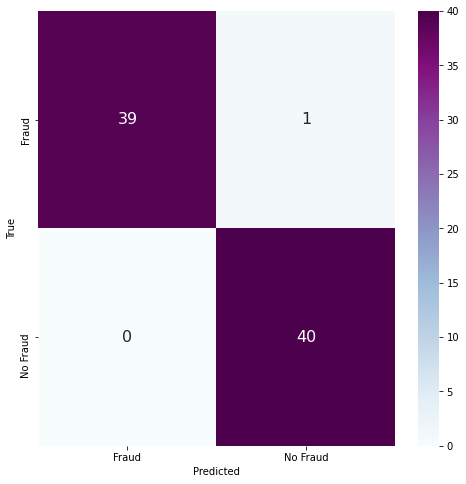

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543

 Test set


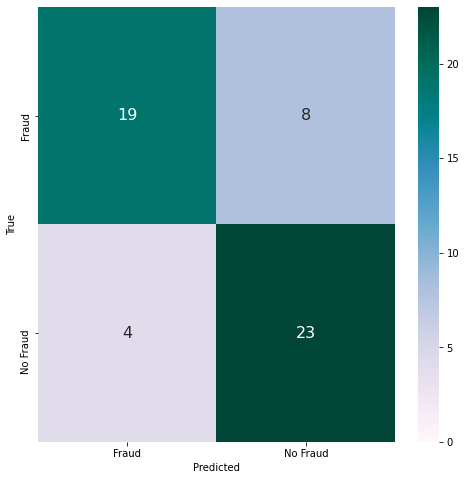

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Min samples =  3

 Train set


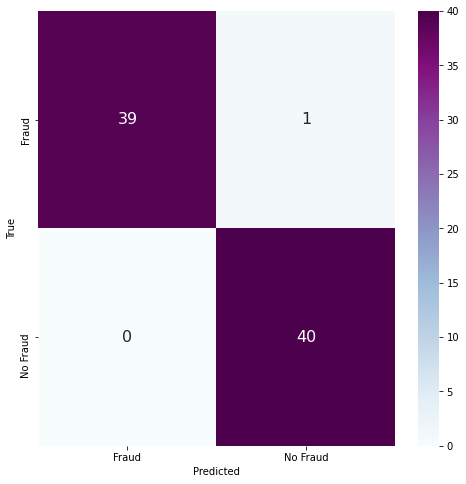

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543

 Test set


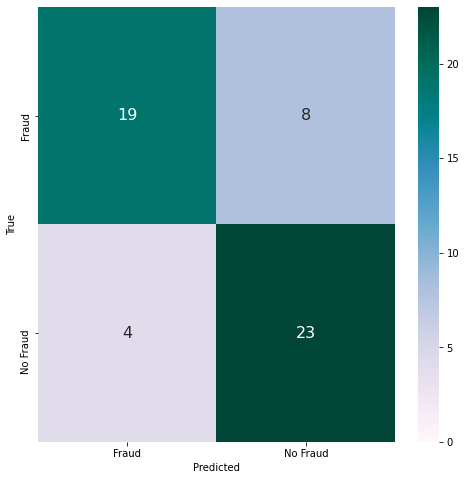

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Min samples =  4

 Train set


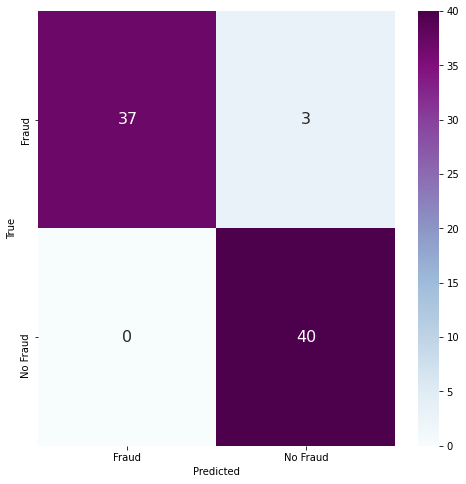

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.9302325581395349 
 Recall:              0.925         1.0 
 F1-score:            0.961038961038961         0.963855421686747

 Test set


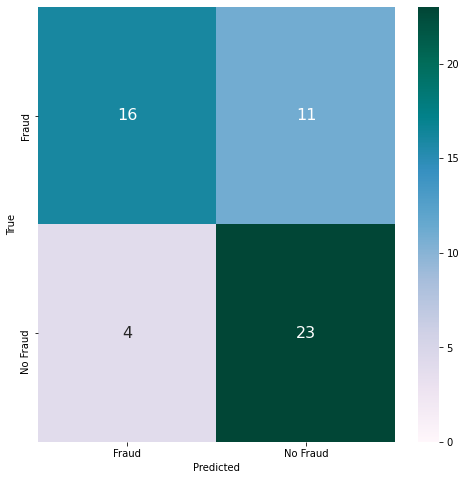

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8         0.6764705882352942 
 Recall:              0.5925925925925926         0.8518518518518519 
 F1-score:            0.6808510638297872         0.7540983606557378

 Min samples =  5

 Train set


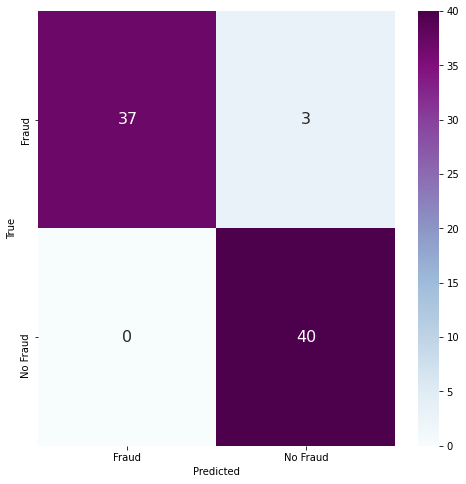

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.9302325581395349 
 Recall:              0.925         1.0 
 F1-score:            0.961038961038961         0.963855421686747

 Test set


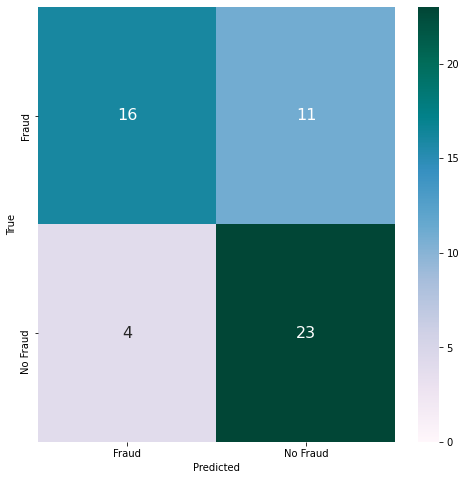

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8         0.6764705882352942 
 Recall:              0.5925925925925926         0.8518518518518519 
 F1-score:            0.6808510638297872         0.7540983606557378

 Min samples =  6

 Train set


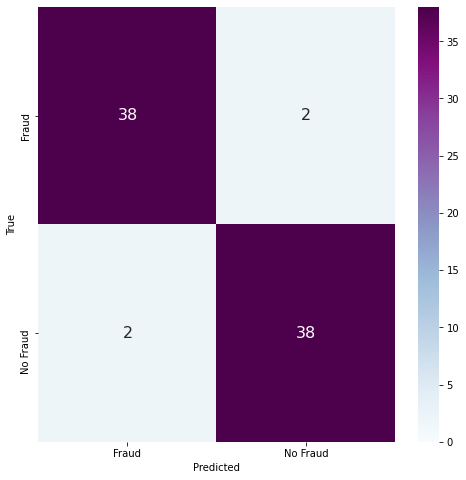

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.95         0.95 
 Recall:              0.95         0.95 
 F1-score:            0.9500000000000001         0.9500000000000001

 Test set


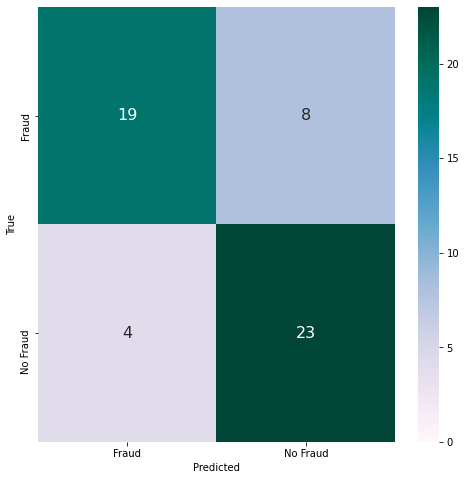

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Min samples =  7

 Train set


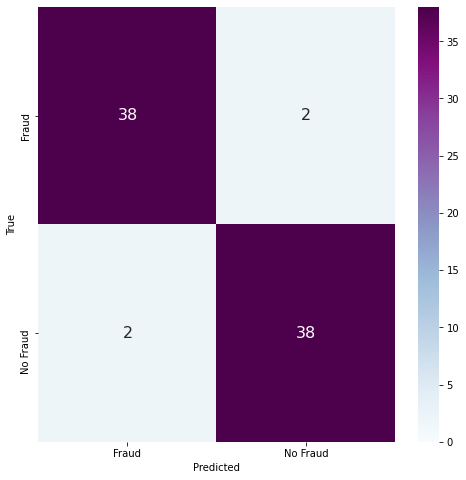

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.95         0.95 
 Recall:              0.95         0.95 
 F1-score:            0.9500000000000001         0.9500000000000001

 Test set


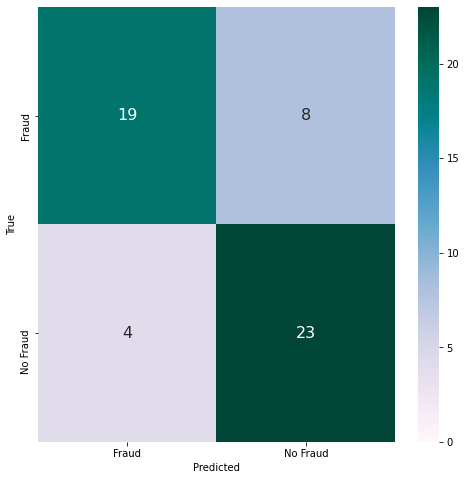

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Min samples =  8

 Train set


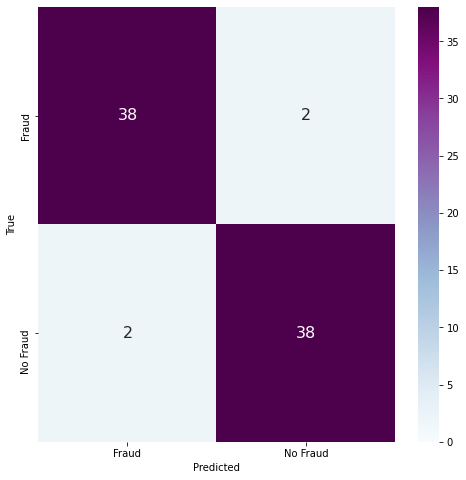

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.95         0.95 
 Recall:              0.95         0.95 
 F1-score:            0.9500000000000001         0.9500000000000001

 Test set


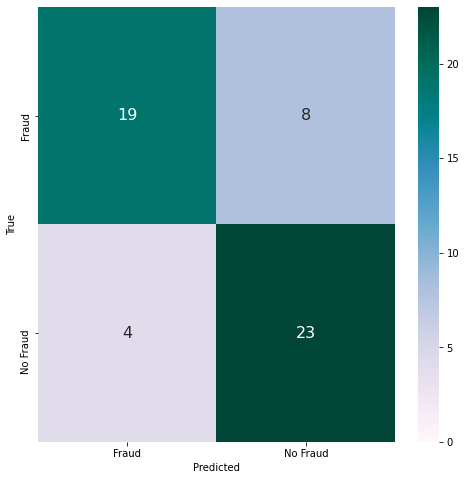

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Min samples =  9

 Train set


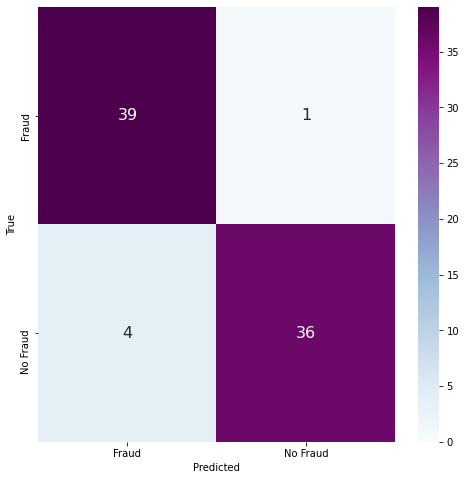

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.9069767441860465         0.972972972972973 
 Recall:              0.975         0.9 
 F1-score:            0.9397590361445783         0.935064935064935

 Test set


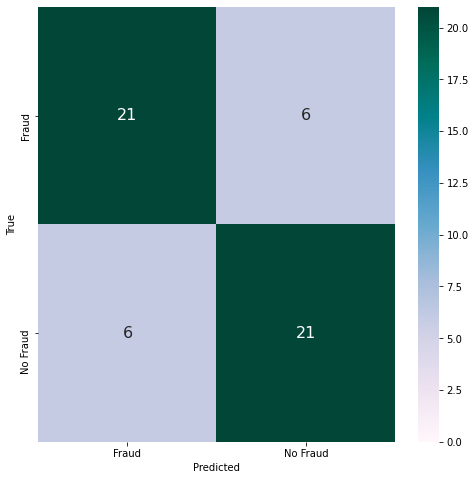

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.7777777777777778         0.7777777777777778 
 Recall:              0.7777777777777778         0.7777777777777778 
 F1-score:            0.7777777777777778         0.7777777777777778

 Min samples =  10

 Train set


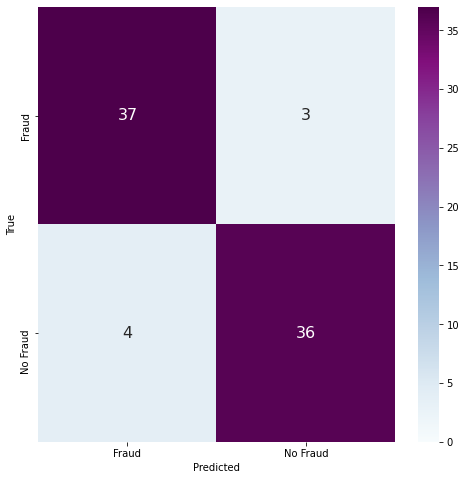

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.9024390243902439         0.9230769230769231 
 Recall:              0.925         0.9 
 F1-score:            0.9135802469135802         0.9113924050632911

 Test set


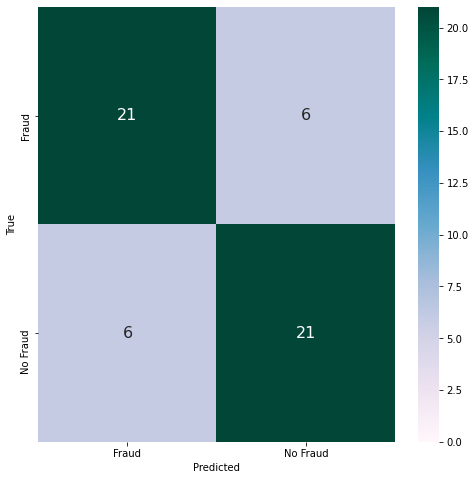

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.7777777777777778         0.7777777777777778 
 Recall:              0.7777777777777778         0.7777777777777778 
 F1-score:            0.7777777777777778         0.7777777777777778


In [ ]:
import numpy as np
min_samples = list(range(2,11))

for min_sample in min_samples:
 # Constructing decision trees varying max_depth values
    decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', # Consider the entropy as criterion for measuring information gain
                                                splitter = 'best', # Consider the best choices of splits
                                                random_state = 8,
                                                min_samples_split = min_sample) 
                                                  
    decision_tree_model.fit(X = x_train, y = y_train)

    dt_predictions_train = decision_tree_model.predict(x_train)
    dt_predictions = decision_tree_model.predict(x_test)
    print('\n','Min samples = ', min_sample)
    print('\n', 'Train set')
    inspection_results_confusion_matrix(y_train, dt_predictions_train, 'train')
    inspection_results_f1_precision_recal(y_train, dt_predictions_train)
    print('\n', 'Test set')
    inspection_results_confusion_matrix(y_test, dt_predictions)
    inspection_results_f1_precision_recal(y_test, dt_predictions)



Setting different values for ```min_samples``` also did not help to reduce overfitting. The best model obtained was with setting ```max_depth = 7```. Let's reproduce this model once again and evaluate it on the test set containing only original data.


 Max depth =  7


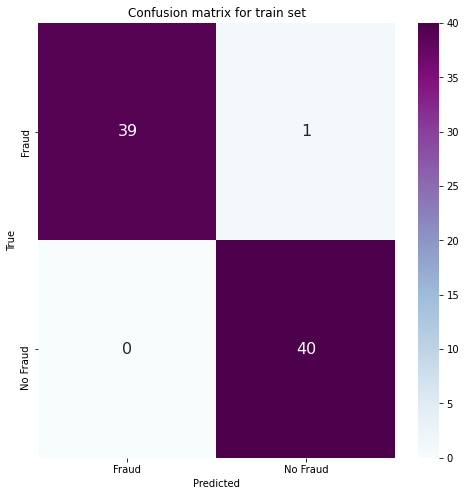

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543




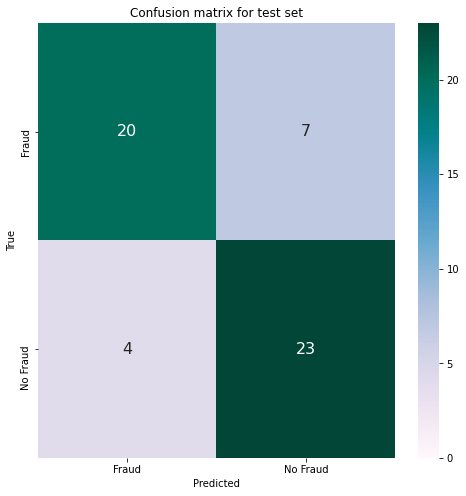

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8333333333333334         0.7666666666666667 
 Recall:              0.7407407407407407         0.8518518518518519 
 F1-score:            0.7843137254901961         0.8070175438596491




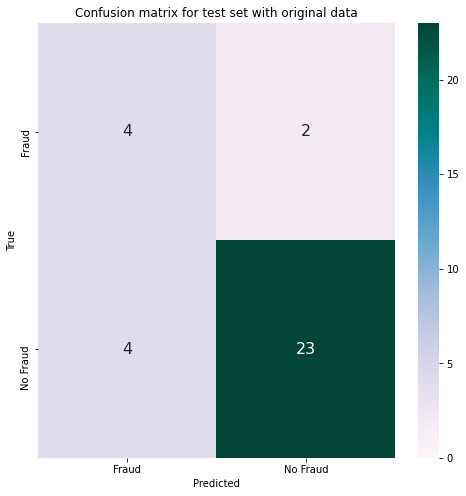

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5         0.92 
 Recall:              0.6666666666666666         0.8518518518518519 
 F1-score:            0.5714285714285715         0.8846153846153846


In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', # Consider the entropy as criterion for measuring information gain
                                                splitter = 'best', # Consider the best choices of splits
                                                random_state = 8, 
                                                max_depth = 7) 
                                                  
decision_tree_model.fit(X = x_train, y = y_train)

dt_predictions_train = decision_tree_model.predict(x_train)
dt_predictions = decision_tree_model.predict(x_test)
dt_predictions_original = decision_tree_model.predict(x_test_original)
print('\n','Max depth = ', 7)

inspection_results_confusion_matrix(y_train, dt_predictions_train, 'train',
                                   title = 'Confusion matrix for train set',
                                   save_img = True,
                                   img_name='tuned_dec_tree_training_confusion_matrix.png')
inspection_results_f1_precision_recal(y_train, dt_predictions_train)
print('\n')
inspection_results_confusion_matrix(y_test, dt_predictions,
                                    title = 'Confusion matrix for test set',
                                    save_img = True,
                                    img_name='tuned_dec_tree_test_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test, dt_predictions)
print('\n')
inspection_results_confusion_matrix(y_test_original, dt_predictions_original,
                                    title = 'Confusion matrix for test set with original data',
                                    save_img = True,
                                    img_name='tuned_dec_tree_test_original_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test_original, dt_predictions_original)

The decision tree model got results that are better than the ones obtained with the logistic regression. It is hard to evaluate the performance of the model when looking only to the test set containing original data, as the number of fraud occurrences is rather small.

When considering the test set containing both synthetic and original data and comparing to the training data, we see that the model is overfitted to the training data. Some hyperparameter tuning allowed us to reduce the difference of performances between these two sets, but not enough to remove the overfitting.

Still, a decision tree model trained with ```max_depth=7``` had F1-score over the Fraud group in the training set of 98% and of 78% for the Fraud group over the test set containing both synthetic and original data. 

Let's try more complex models to see if this performance over the Fraud group can be improved. We will use now Random Forests.

### Random Forest

Random forest is a model that consists of an ensemble of many different decision trees.


 Max depth:  2

 Confusion matrix for train set


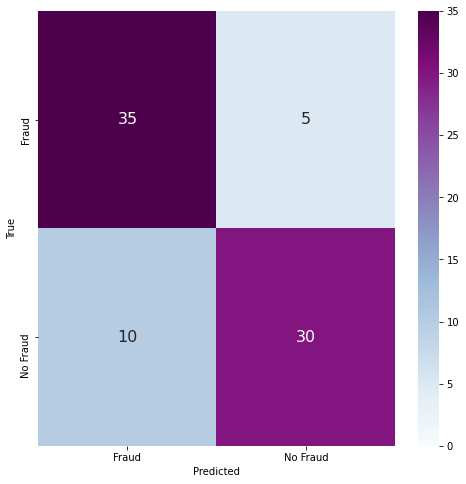

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.7777777777777778         0.8571428571428571 
 Recall:              0.875         0.75 
 F1-score:            0.823529411764706         0.7999999999999999

 Confusion matrix for test set with both synthetic and original data


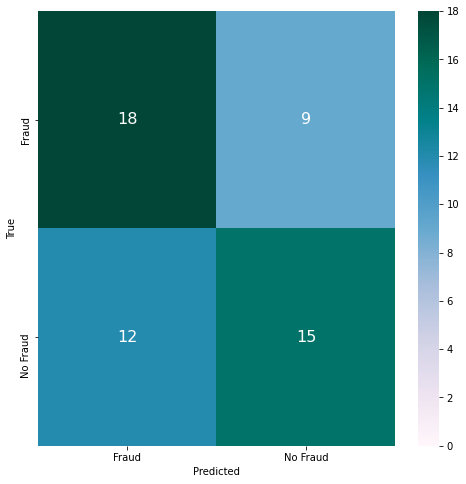

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.6         0.625 
 Recall:              0.6666666666666666         0.5555555555555556 
 F1-score:            0.631578947368421         0.5882352941176471

 Confusion matrix for test set with original data


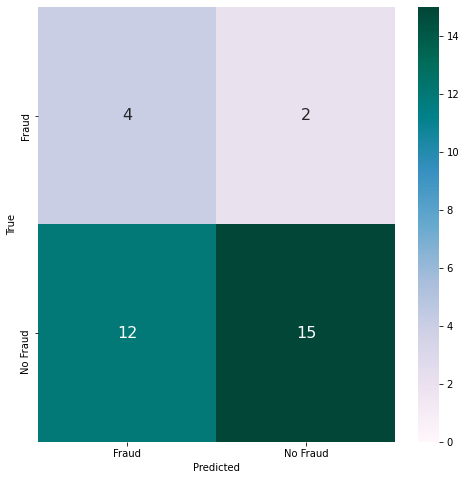

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.25         0.8823529411764706 
 Recall:              0.6666666666666666         0.5555555555555556 
 F1-score:            0.36363636363636365         0.6818181818181819

 Max depth:  3

 Confusion matrix for train set


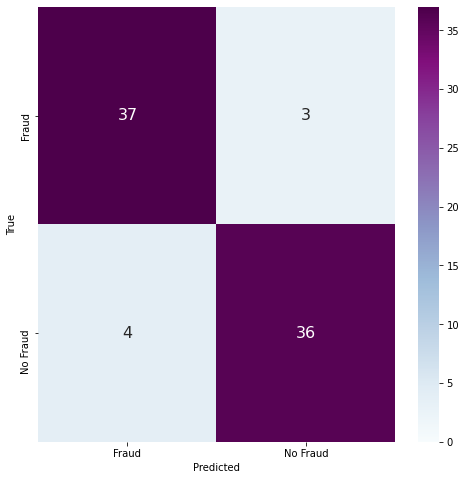

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.9024390243902439         0.9230769230769231 
 Recall:              0.925         0.9 
 F1-score:            0.9135802469135802         0.9113924050632911

 Confusion matrix for test set with both synthetic and original data


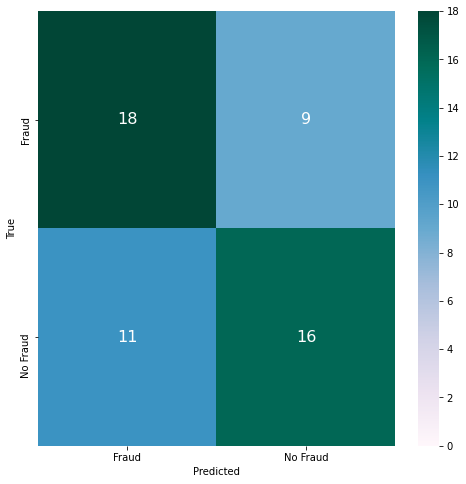

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.6206896551724138         0.64 
 Recall:              0.6666666666666666         0.5925925925925926 
 F1-score:            0.6428571428571429         0.6153846153846153

 Confusion matrix for test set with original data


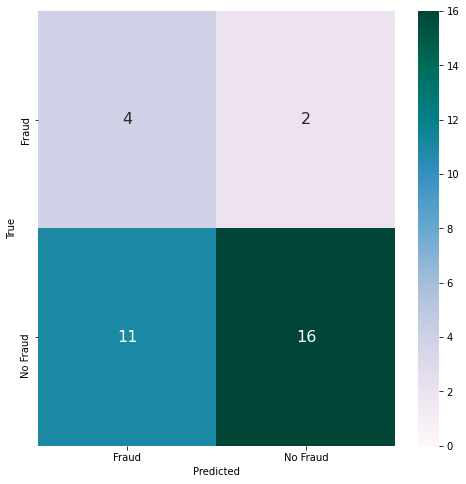

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.26666666666666666         0.8888888888888888 
 Recall:              0.6666666666666666         0.5925925925925926 
 F1-score:            0.3809523809523809         0.711111111111111

 Max depth:  4

 Confusion matrix for train set


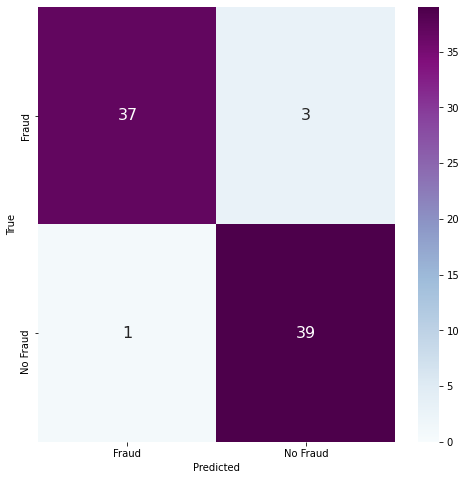

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.9736842105263158         0.9285714285714286 
 Recall:              0.925         0.975 
 F1-score:            0.9487179487179489         0.951219512195122

 Confusion matrix for test set with both synthetic and original data


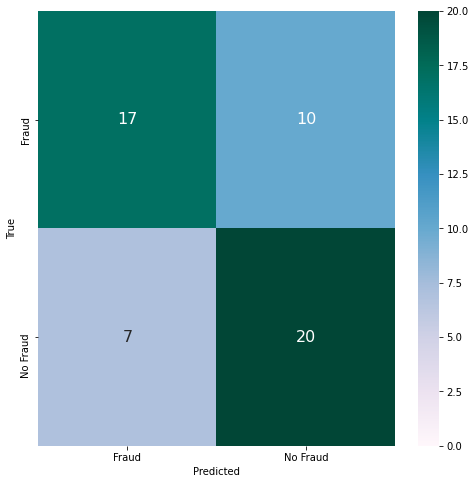

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.7083333333333334         0.6666666666666666 
 Recall:              0.6296296296296297         0.7407407407407407 
 F1-score:            0.6666666666666667         0.7017543859649122

 Confusion matrix for test set with original data


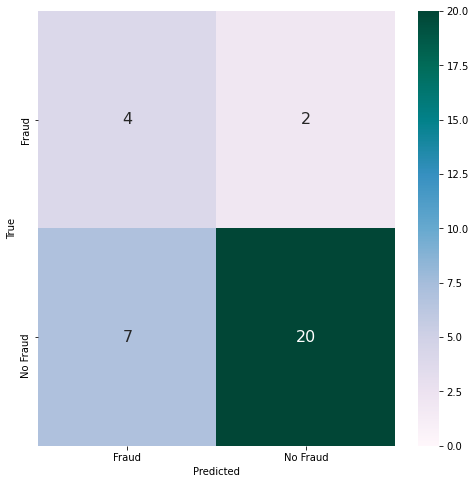

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.36363636363636365         0.9090909090909091 
 Recall:              0.6666666666666666         0.7407407407407407 
 F1-score:            0.4705882352941177         0.8163265306122449

 Max depth:  5

 Confusion matrix for train set


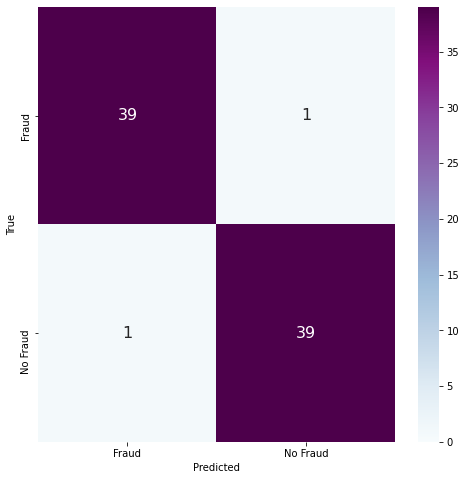

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.975         0.975 
 Recall:              0.975         0.975 
 F1-score:            0.975         0.975

 Confusion matrix for test set with both synthetic and original data


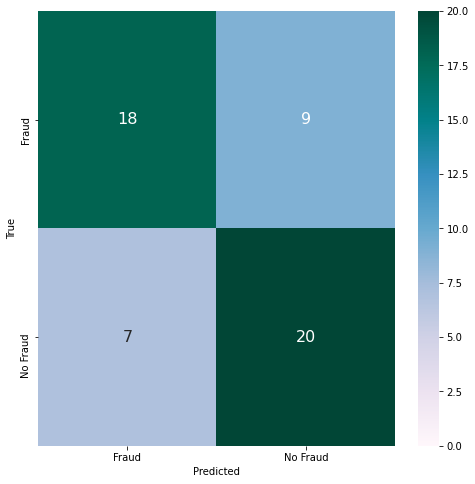

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.72         0.6896551724137931 
 Recall:              0.6666666666666666         0.7407407407407407 
 F1-score:            0.6923076923076923         0.7142857142857143

 Confusion matrix for test set with original data


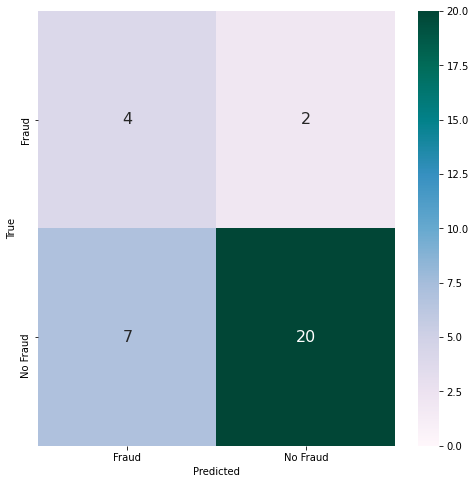

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.36363636363636365         0.9090909090909091 
 Recall:              0.6666666666666666         0.7407407407407407 
 F1-score:            0.4705882352941177         0.8163265306122449

 Max depth:  6

 Confusion matrix for train set


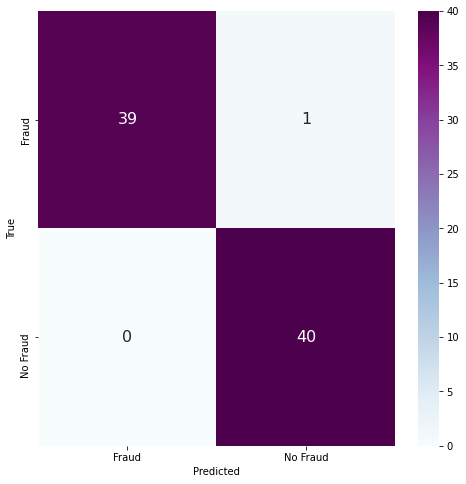

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543

 Confusion matrix for test set with both synthetic and original data


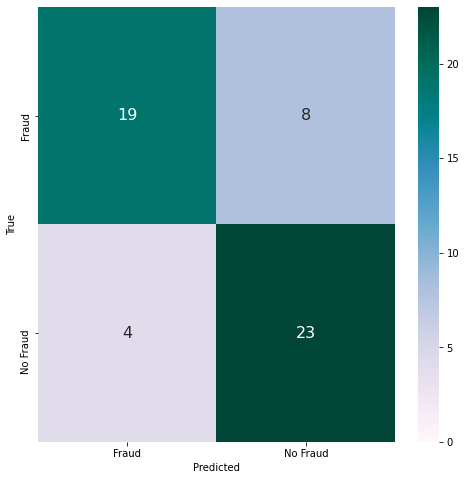

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8260869565217391         0.7419354838709677 
 Recall:              0.7037037037037037         0.8518518518518519 
 F1-score:            0.76         0.7931034482758621

 Confusion matrix for test set with original data


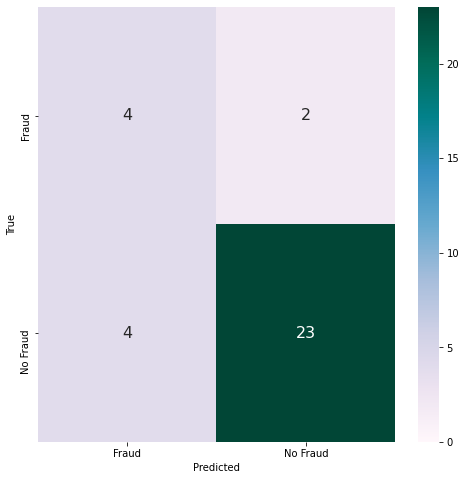

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5         0.92 
 Recall:              0.6666666666666666         0.8518518518518519 
 F1-score:            0.5714285714285715         0.8846153846153846

 Max depth:  7

 Confusion matrix for train set


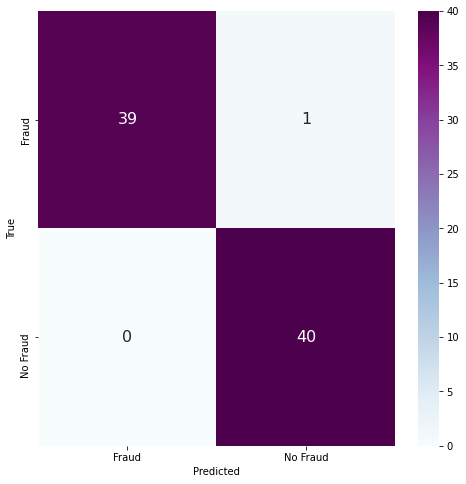

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543

 Confusion matrix for test set with both synthetic and original data


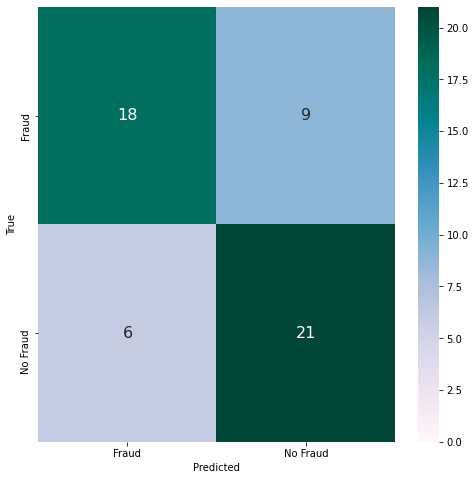

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.75         0.7 
 Recall:              0.6666666666666666         0.7777777777777778 
 F1-score:            0.7058823529411765         0.7368421052631577

 Confusion matrix for test set with original data


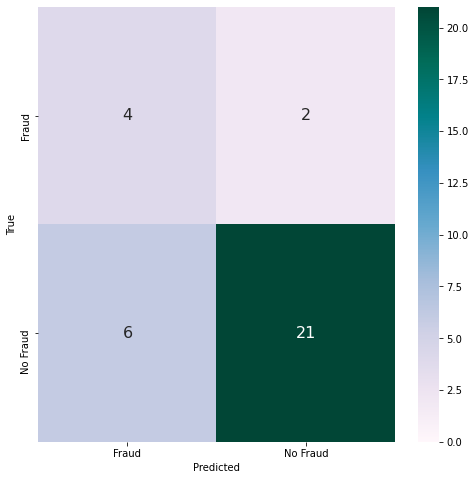

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.4         0.9130434782608695 
 Recall:              0.6666666666666666         0.7777777777777778 
 F1-score:            0.5         0.84

 Max depth:  8

 Confusion matrix for train set


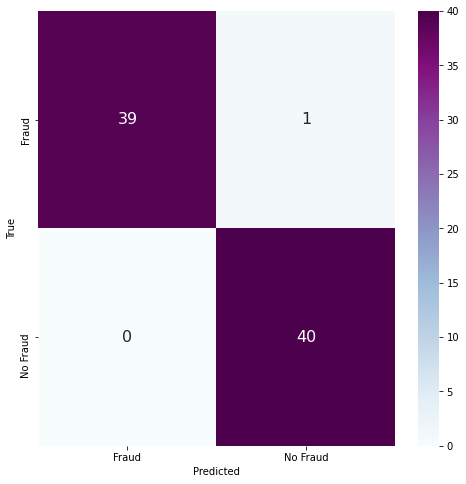

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543

 Confusion matrix for test set with both synthetic and original data


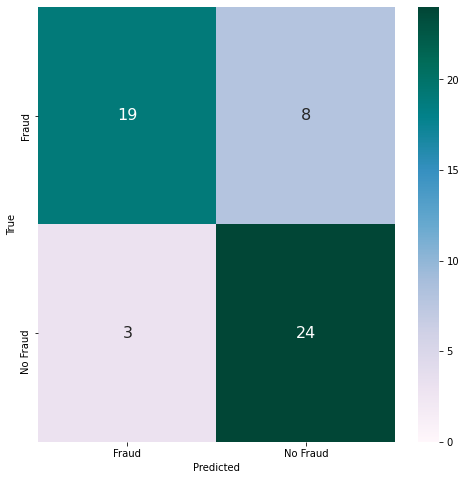

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8636363636363636         0.75 
 Recall:              0.7037037037037037         0.8888888888888888 
 F1-score:            0.7755102040816326         0.8135593220338982

 Confusion matrix for test set with original data


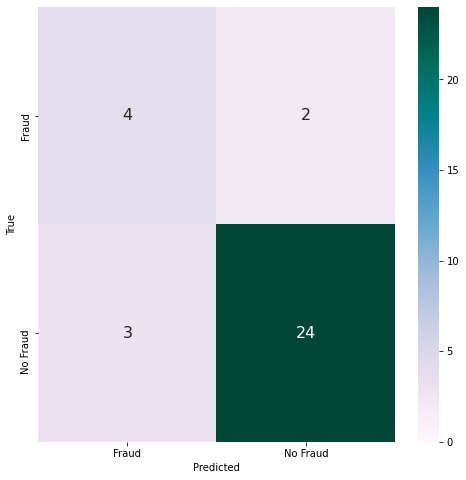

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5714285714285714         0.9230769230769231 
 Recall:              0.6666666666666666         0.8888888888888888 
 F1-score:            0.6153846153846153         0.9056603773584906

 Max depth:  9

 Confusion matrix for train set


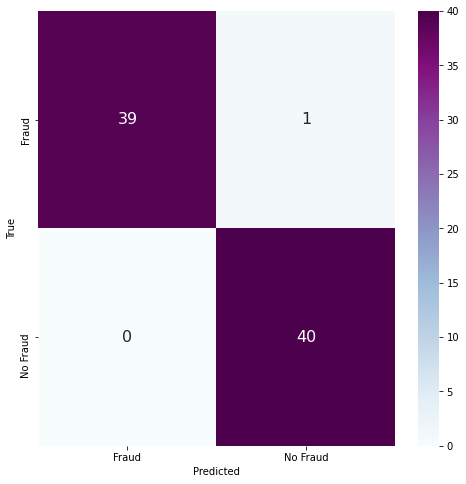

 Inspection results:          Fraud            |         No Fraud  
 Precision:           1.0         0.975609756097561 
 Recall:              0.975         1.0 
 F1-score:            0.9873417721518987         0.9876543209876543

 Confusion matrix for test set with both synthetic and original data


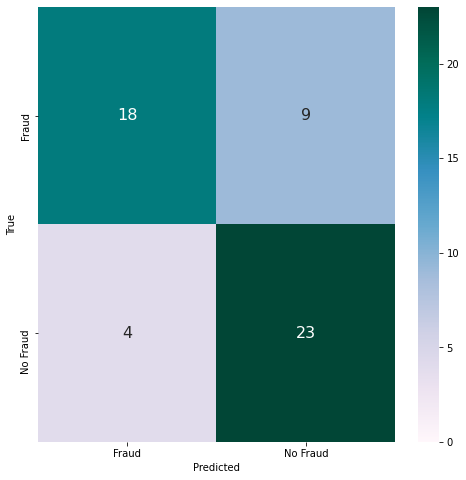

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8181818181818182         0.71875 
 Recall:              0.6666666666666666         0.8518518518518519 
 F1-score:            0.7346938775510203         0.7796610169491525

 Confusion matrix for test set with original data


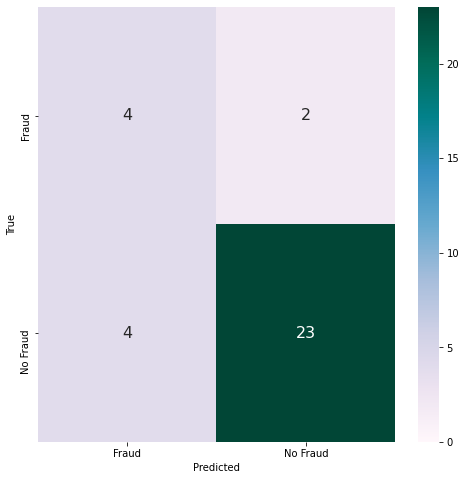

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5         0.92 
 Recall:              0.6666666666666666         0.8518518518518519 
 F1-score:            0.5714285714285715         0.8846153846153846


In [ ]:
from sklearn.ensemble import RandomForestClassifier

for max_depth in range(2,10):
    rf_model = RandomForestClassifier(n_estimators=20, # Setting the number of decision trees used
                                      random_state = 5, # Setting the random_state to always obtain the same result
                                      max_depth = max_depth)
    rf_model.fit(X = x_train, y = y_train)
    rf_pred_train = rf_model.predict(x_train)
    rf_pred = rf_model.predict(x_test)
    rf_pred_original = rf_model.predict(x_test_original)
    print('\n','Max depth: ', max_depth)
    print('\n', 'Confusion matrix for train set')
    inspection_results_confusion_matrix(y_train, rf_pred_train, 'train')
    inspection_results_f1_precision_recal(y_train, rf_pred_train)
    print('\n', 'Confusion matrix for test set with both synthetic and original data')
    inspection_results_confusion_matrix(y_test, rf_pred)
    inspection_results_f1_precision_recal(y_test, rf_pred)
    print('\n', 'Confusion matrix for test set with original data')
    inspection_results_confusion_matrix(y_test_original, rf_pred_original)
    inspection_results_f1_precision_recal(y_test_original, rf_pred_original)

The random forest model with ```max_depth = 8``` acchieved a performance that is equivalent to the best Decision Tree model we constructed. This means that sampling multiple decision trees does not help to improve the performance.



As the models attained high performances on the train set, but did not had considerable performance increase on the test sets when tuning some hyperparameters, it may be possible that some adjusting the data is capable of feed the models in a more proper way. 

To see if this makes sense, I will reproduce the logistic regression and decision tree models after obtaining the principal components of the data, that is, after using the PCA method.

### Models with PCA

The principal component analysis (PCA) is a technique for reducing dimensionality of data, by taking some vectors in the hyperdimensional space of dimension = number of variables that are capable of representing most of the variance of all the variables. Such vectors are linear combinations of the original variables and can be used to represent all these variables, thus reducing the dimensionality of the problem.

This method is also useful for removing the problem of multicollinearity mentioned before. 

In [ ]:
x_data

,Consumption 12M,Consumption 11M,Consumption 10M,Consumption 9M,Consumption 8M,Consumption 7M,Consumption 6M,Consumption 5M,Consumption 4M,Consumption 3M,Consumption 2M,Consumption 1M,Class - Residential,Phase - 1 Phase,Phase - 2 Phase
0,0.051875,0.058362,0.027474,0.077309,0.062432,0.061853,0.027992,0.053688,0.082140,0.015546,0.038741,0.003984,1.0,1.000000,0.0
1,0.063217,0.069037,0.040847,0.101777,0.100085,0.108862,0.075494,0.105596,0.087810,0.050631,0.050602,0.044565,1.0,0.000000,1.0
2,0.002250,0.001735,0.000777,0.001974,0.001705,0.002014,0.026190,0.014093,0.033895,0.014336,0.026950,0.014969,1.0,0.000000,1.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036634,0.071606,0.068484,0.021201,0.026633,0.070120,1.0,1.000000,0.0
4,0.032171,0.018820,0.006452,0.014511,0.013811,0.013696,0.007581,0.012746,0.021308,0.021959,0.019784,0.018497,1.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.009333,0.007241,0.003681,0.008592,0.002910,0.000000,0.000000,0.009864,0.009978,0.007265,0.009110,0.015171,1.0,1.000000,0.0
130,0.021665,0.023023,0.012599,0.029566,0.028142,0.028668,0.012634,0.026070,0.022431,0.012621,0.020345,0.018723,0.0,1.000000,0.0
131,0.144272,0.081114,0.057052,0.126542,0.058055,0.177958,0.171733,0.024396,0.060297,0.031117,0.077494,0.051767,0.0,0.839709,0.0
132,0.000268,0.003714,0.022766,0.063401,0.045628,0.060366,0.039976,0.087752,0.111685,0.044827,0.054727,0.065550,1.0,1.000000,0.0


In [ ]:
from sklearn.decomposition import PCA

principal_components = PCA()
pc_data = principal_components.fit_transform(X = x_data, y=y_data)

Let's evaluate the total variance explained by the sum of the principal components to determine how many PCs to take.

In [ ]:
for i in range(1,len(principal_components.explained_variance_ratio_)):
  print('Soma dos ', i, 'componentes principais:',f"{principal_components.explained_variance_ratio_[:i].sum()*100:.2f}", '% da variância total explicada')  

Soma dos  1 componentes principais: 40.26 % da variância total explicada
Soma dos  2 componentes principais: 68.12 % da variância total explicada
Soma dos  3 componentes principais: 88.48 % da variância total explicada
Soma dos  4 componentes principais: 94.87 % da variância total explicada
Soma dos  5 componentes principais: 97.26 % da variância total explicada
Soma dos  6 componentes principais: 98.69 % da variância total explicada
Soma dos  7 componentes principais: 99.44 % da variância total explicada
Soma dos  8 componentes principais: 99.71 % da variância total explicada
Soma dos  9 componentes principais: 99.84 % da variância total explicada
Soma dos  10 componentes principais: 99.89 % da variância total explicada
Soma dos  11 componentes principais: 99.94 % da variância total explicada
Soma dos  12 componentes principais: 99.97 % da variância total explicada
Soma dos  13 componentes principais: 99.99 % da variância total explicada
Soma dos  14 componentes principais: 100.00 % d

If we take the first 6 principal components, the total variance explained is considerably good (98,69%).

Now, let's verify what such principal components represent

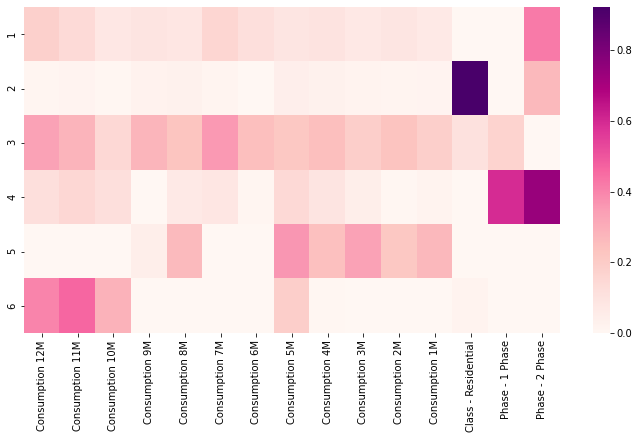

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(principal_components.components_[:6],cmap='RdPu', vmin=0, xticklabels = x_data.columns, yticklabels = [1,2,3,4,5,6])

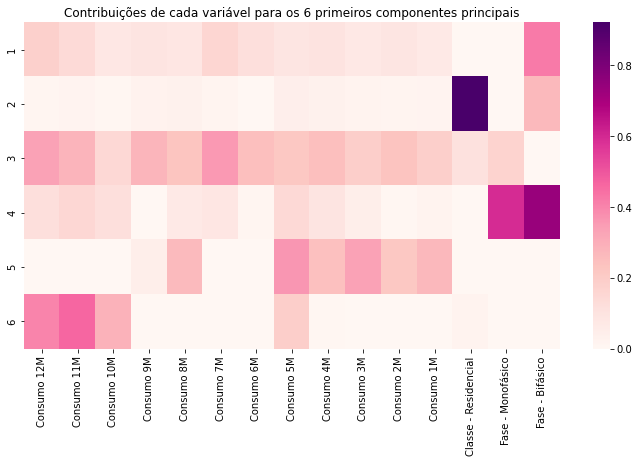

In [ ]:
translated_columns = ['Consumo 12M',
                      'Consumo 11M',
                      'Consumo 10M',
                      'Consumo 9M',
                      'Consumo 8M',
                      'Consumo 7M',
                      'Consumo 6M',
                      'Consumo 5M',
                      'Consumo 4M',
                      'Consumo 3M',
                      'Consumo 2M',
                      'Consumo 1M',
                      'Classe - Residencial',
                      'Fase - Monofásico',
                      'Fase - Bifásico']
plt.figure(figsize=(12,6))
sns.heatmap(principal_components.components_[:6],cmap='RdPu', vmin=0, xticklabels = translated_columns, yticklabels = [1,2,3,4,5,6])
plt.title('Contribuições de cada variável para os 6 primeiros componentes principais')
plt.savefig('principal_components_contribs.png', transparent = True)

In [ ]:
pc_data

array([[-5.27964191e-01,  3.26027299e-01,  1.39222908e-01, ...,
         1.28216231e-02,  2.73307274e-03, -9.67107686e-04],
       [ 6.57920450e-01,  8.74940965e-01, -3.74242419e-01, ...,
         5.43415542e-03, -1.09314886e-02, -5.60470309e-04],
       [ 5.71987180e-01,  8.58090638e-01, -5.72687543e-01, ...,
        -3.53130768e-03, -1.20095347e-02, -4.81458081e-03],
       ...,
       [ 2.19845642e-02, -5.45691066e-01,  1.42993502e-01, ...,
         4.15768618e-03,  2.37546828e-03,  6.57259077e-04],
       [-5.32958387e-01,  3.27866656e-01,  1.36149596e-01, ...,
        -1.19803884e-04,  1.19729952e-03, -3.03978007e-03],
       [-5.86178680e-01,  3.14707823e-01,  4.83366322e-03, ...,
        -6.12904151e-03, -3.81557548e-04,  3.08680454e-03]])

The above graphic indicates which columns of the data contribute the most to each principal component. The principal component #2, for example, mostly consists of the contributions of ```Class``` and of a slight contribution of ```Phase - 2 Phase```.

Interestingly, the principal components #5 and #6 consist, each one, of subsets of the consumption data (8M + 5M - 1M for component #5 and 12M-10M + 5M for component #6), not by all or an intuitive sequence of some of them.

Now, let's reproduce the previous models (logistic regression and decision tree) using such principal components.

First, let's create a dataframe for the principal components.

In [ ]:
pc_data = pd.DataFrame(data=pc_data[:, :6], columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

In [ ]:
pc_data

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.527964,0.326027,0.139223,0.040861,-0.029600,0.011018
1,0.657920,0.874941,-0.374242,0.205105,-0.001703,-0.096942
2,0.571987,0.858091,-0.572688,0.146229,-0.017763,-0.077171
3,-0.565361,0.320754,0.056181,0.017034,0.007085,-0.004547
4,-0.569441,0.317588,0.042466,0.011697,-0.036820,0.019564
...,...,...,...,...,...,...
129,-0.583957,0.315384,0.010657,0.002553,-0.036377,0.016326
130,-0.197197,-0.601139,-0.054094,0.071756,0.012451,-0.012162
131,0.021985,-0.545691,0.142994,0.025976,-0.109715,-0.066393
132,-0.532958,0.327867,0.136150,0.035630,0.025461,-0.044308


Using the same splitting indexes as before to define train, test and test_original sets with pc_data:

In [ ]:
pc_data.loc[x_train.index]

,PC1,PC2,PC3,PC4,PC5,PC6
29,0.956000,-0.057363,-0.639188,0.211652,0.087818,-0.122123
12,-0.583211,0.315440,0.011750,0.003523,-0.038819,0.020442
94,-0.216838,-0.604012,-0.098672,0.060886,0.025319,-0.005095
47,0.526024,-0.326770,-0.238114,-0.528079,0.035469,0.055212
58,-0.214262,-0.604439,-0.094666,0.061807,0.011779,0.001353
...,...,...,...,...,...,...
23,1.222017,-0.034215,-0.151174,0.444355,-0.242727,0.654389
92,-0.224743,-0.606562,-0.117966,0.053506,0.000713,-0.005273
103,-0.586181,0.314518,0.004481,0.000541,-0.043928,0.019024
67,-0.221817,-0.605982,-0.110667,0.054281,0.007305,-0.011183


In [ ]:
pc_train = pc_data.loc[x_train.index]
pc_test = pc_data.loc[x_test.index]
pc_test_original = pc_data.loc[x_test_original.index]

Now, we can evaluate the models once again. 

#### Logistic Regression



In [ ]:
# Logistic Regression model using principal components
lm_pc = LogisticRegression()
lm_pc.fit(X = pc_train, y = y_train)
lm_pc_predictions_train = lm_pc.predict(pc_train)
lm_pc_predictions = lm_pc.predict(pc_test)
lm_pc_predictions_original = lm_pc.predict(pc_test_original)

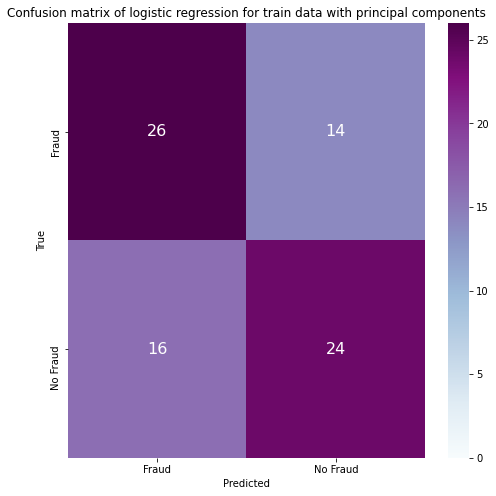

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.6190476190476191         0.631578947368421 
 Recall:              0.65         0.6 
 F1-score:            0.6341463414634146         0.6153846153846154




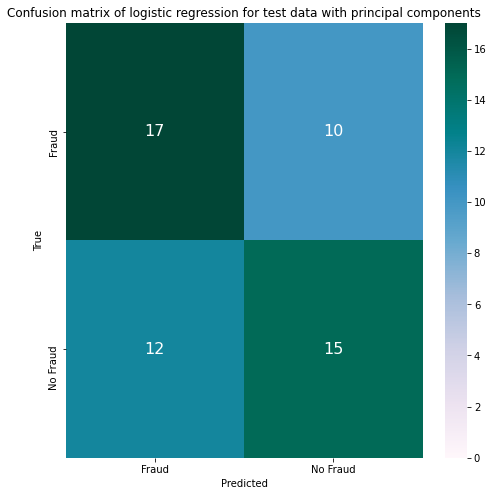

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5862068965517241         0.6 
 Recall:              0.6296296296296297         0.5555555555555556 
 F1-score:            0.6071428571428571         0.576923076923077




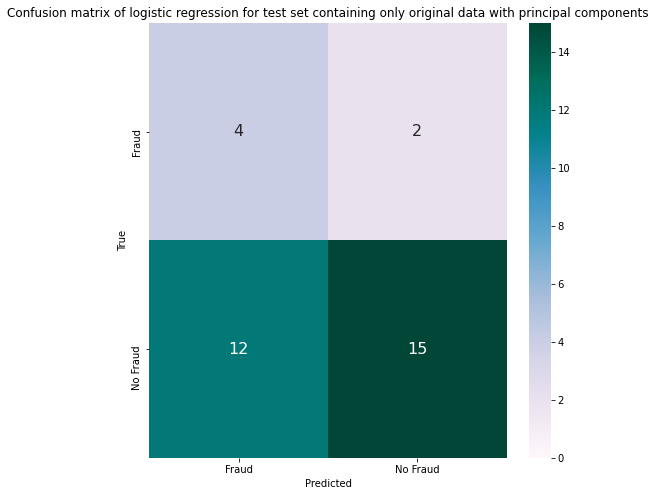

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.25         0.8823529411764706 
 Recall:              0.6666666666666666         0.5555555555555556 
 F1-score:            0.36363636363636365         0.6818181818181819


In [ ]:
print('\n')
inspection_results_confusion_matrix(y_train, lm_pc_predictions_train, 'train',
                                    title = 'Confusion matrix of logistic regression for train data with principal components',
                                    save_img = True,
                                    img_name = 'pca_log_reg_train_confusion_matrix.png')
inspection_results_f1_precision_recal(y_train, lm_pc_predictions_train)

print('\n')
inspection_results_confusion_matrix(y_test, lm_pc_predictions, 'test',
                                    title = 'Confusion matrix of logistic regression for test data with principal components',
                                    save_img = True,
                                    img_name = 'pca_log_reg_test_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test, lm_pc_predictions)

print('\n')
inspection_results_confusion_matrix(y_test_original, lm_pc_predictions_original, 'test',
                                    title = 'Confusion matrix of logistic regression for test set containing only original data with principal components',
                                    save_img = True,
                                    img_name = 'pca_log_reg_test_original_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test_original, lm_pc_predictions_original)

The logistic model using PCA resulted in exactly the same performances for each of the groups. Let's see if PCA has an effect over the decision tree models.

#### Decision Tree

In [ ]:
dt_pc = DecisionTreeClassifier(criterion = 'entropy', # Consider the entropy as criterion for measuring information gain
                                                splitter = 'best', # Consider the best choices of splits
                                                random_state = 8, 
                                                max_depth = 7) 
                                                  
dt_pc.fit(X = pc_train, y = y_train)

dt_pred_train = dt_pc.predict(pc_train)
dt_pred = dt_pc.predict(pc_test)
dt_pred_original = dt_pc.predict(pc_test_original)

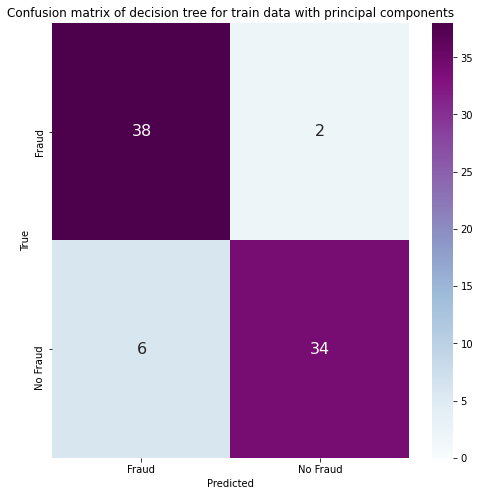

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.8636363636363636         0.9444444444444444 
 Recall:              0.95         0.85 
 F1-score:            0.9047619047619048         0.8947368421052632




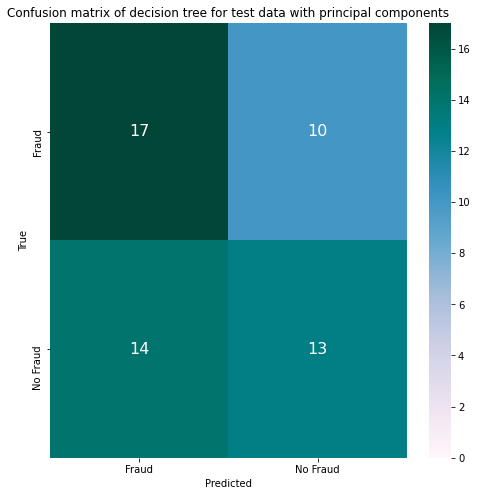

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.5483870967741935         0.5652173913043478 
 Recall:              0.6296296296296297         0.48148148148148145 
 F1-score:            0.5862068965517241         0.52




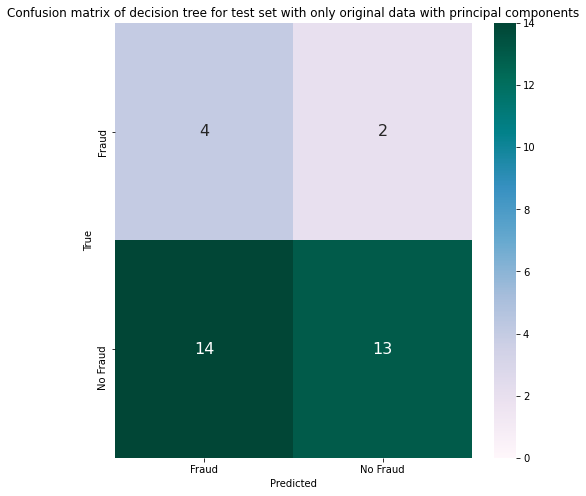

 Inspection results:          Fraud            |         No Fraud  
 Precision:           0.2222222222222222         0.8666666666666667 
 Recall:              0.6666666666666666         0.48148148148148145 
 F1-score:            0.3333333333333333         0.6190476190476191


In [ ]:
print('\n')
inspection_results_confusion_matrix(y_train, dt_pred_train, 'train',
                                    title = 'Confusion matrix of decision tree for train data with principal components',
                                    save_img = True,
                                    img_name = 'pca_dec_tree_train_confusion_matrix.png')
inspection_results_f1_precision_recal(y_train, dt_pred_train)

print('\n')
inspection_results_confusion_matrix(y_test, dt_pred, 'test',
                                    title = 'Confusion matrix of decision tree for test data with principal components',
                                    save_img = True,
                                    img_name = 'pca_dec_tree_test_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test, dt_pred)

print('\n')
inspection_results_confusion_matrix(y_test_original, dt_pred_original, 'test',
                                    title = 'Confusion matrix of decision tree for test set with only original data with principal components',
                                    save_img = True,
                                    img_name = 'pca_dec_tree_test_original_confusion_matrix.png')
inspection_results_f1_precision_recal(y_test_original, dt_pred_original)

The principal component analysis decreased the performance of the decision tree model for every set (train, test and test with only original data) in comparison to the decision tree model consisting of the original variables.




To conclude, as the principal component analysis did not help de performance of either the logistic regression model or the decision tree model, the models kept are the logistic regression and the tuned decision tree with ```max_depth=7```.

The logistic regression is an extremely simple model that already performed better than the model initially possessed by the company. However, its performance is not very good for a practical use.

The decision tree model is able to express more complexity than the logistic regression. Its performance over the train set was extremely high, indicating that there could be an overfitting, which was also confirmed when evaluating the metrics for the test sets. 

We made some attempts to reduce such overfitting, such as using random forests and fine tuning some hyperperameters. The final model we acchieved still suffered of overfitting, but its performances over the test sets were considerably better than the performances of either the logistic regression or the model initially possessed by the company.